# <center> Bengaluru House Price Prediction <center>

![](https://i.imgur.com/j6FuBvD.jpg)

# <center> Description <center>

## Key Factors a Potential Homebuyer Considers Before Purchasing a Home

### When purchasing a home, buyers evaluate numerous factors: location, property size, proximity to offices, schools, parks, restaurants, hospitals, or even the allure of a stereotypical white picket fence. However, the most critical factor often remains the price.

## Impact of Policy and Market Trends on Housing Sales

The lingering effects of demonetization, the enforcement of the Real Estate (Regulation and Development) Act (RERA), and eroded trust in property developers have significantly impacted India's real estate market. Housing sales across the country dropped by 7% in 2017. Specifically, Bengaluru witnessed a nearly 5% decline in property prices during the latter half of 2017, according to a study by property consultancy Knight Frank.

## Housing Affordability in Bengaluru

For potential homeowners, Bengaluru offers a wide range of options:

 - Over 9,000 apartments priced between ₹42-52 lakh.
 - More than 7,100 apartments in the ₹52-62 lakh segment.
 - Around 5,000 housing projects available in the affordable ₹15-25 lakh category.
 - Numerous options in the ₹34-43 lakh price range, according to a report by property platform Makaan.
 
## Unique Challenges of Buying a Home in Bengaluru
Buying a home in Bengaluru is a complex decision. While common factors like price and location are universal across metropolitan cities, Bengaluru presents unique considerations. Known as the Silicon Valley of India, the city attracts a millennial workforce with its vibrant culture, favorable climate, and abundant job opportunities. These features make it challenging to pinpoint fair pricing in a dynamic real estate market.

## ML Problem Statement 
By analyzing these Bangalore house data we will determine the approximate price for the houses.

## Feature Description

<b>Area_type</b> - Description of the area<br>
<b>Availability</b> - When it can be possessed or when it is ready<br>
<b>Location</b> - Where it is located in Bengaluru<br>
<b>Size</b> - BHK or Bedrooms<br>
<b>Society</b> - To which society it belongs<br>
<b>Total_sqft</b> - Size of the property in sq.ft<br>
<b>Bath</b> - No. of Bathrooms<br>
<b>Balcony</b> - No. of the Balcony<br>
<b>Price</b> - Value of the property in lakhs (Indian Rupee - <b>₹</b>)<br><br>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,make_scorer
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingRegressor, StackingRegressor

## Loading Dataset

In [2]:
data = pd.read_csv('Bengaluru_House_Data.csv')

## Inspecting Dataset

In [3]:
data.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

## Checking Columns

In [4]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

## Checking shape of dataset

In [5]:
data.shape

(13320, 9)

## Information aboout dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### To know the description about the dataset

In [7]:
data.describe()

bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000

In [8]:
data.describe(include='object')

area_type   availability    location   size  society  \
count                  13320          13320       13319  13304     7818   
unique                     4             81        1305     31     2688   
top     Super built-up  Area  Ready To Move  Whitefield  2 BHK  GrrvaGr   
freq                    8790          10581         540   5199       80   

       total_sqft  
count       13320  
unique       2117  
top          1200  
freq          843

### Checking the frequency of different values in each column

In [9]:
for cols in data.columns:
    print(data[cols].value_counts())
    print(50*'*')

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
**************************************************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
**************************************************
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Le

### Checking if there is some null values or not (Percentage)

In [10]:
data.isna().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

It looks like more than 40% data is missing in society column. This feature doesn't add any value to the model we gonna build, so we will be dropping the society column and fill other columns with missing values using other imputation methods.

In [11]:
data.drop(columns=['society'], inplace=True)

In [12]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

# <center> Exploratory Data Analysis (EDA) <center>

In [13]:
data['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

<Axes: xlabel='bath'>

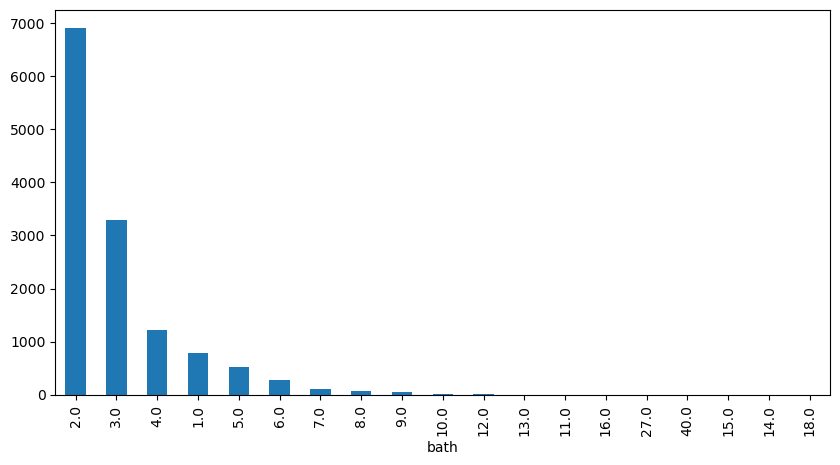

In [14]:
data.bath.value_counts().plot(kind='bar', figsize=(10,5))

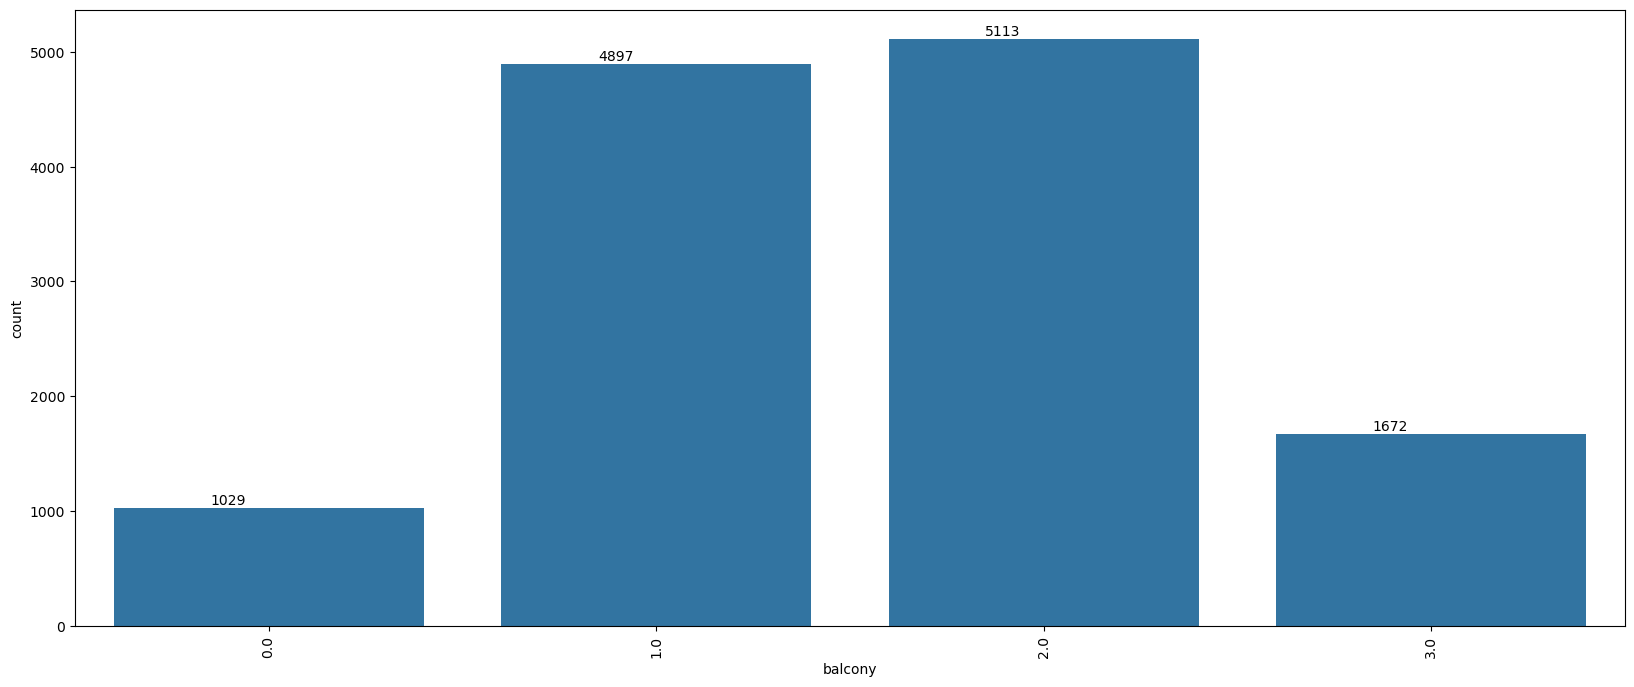

In [15]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'balcony', data = data)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

<Axes: xlabel='area_type'>

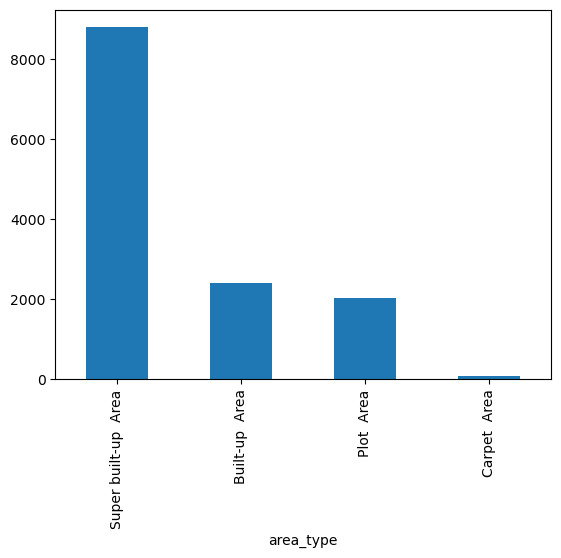

In [16]:
data['area_type'].value_counts().plot(kind="bar")

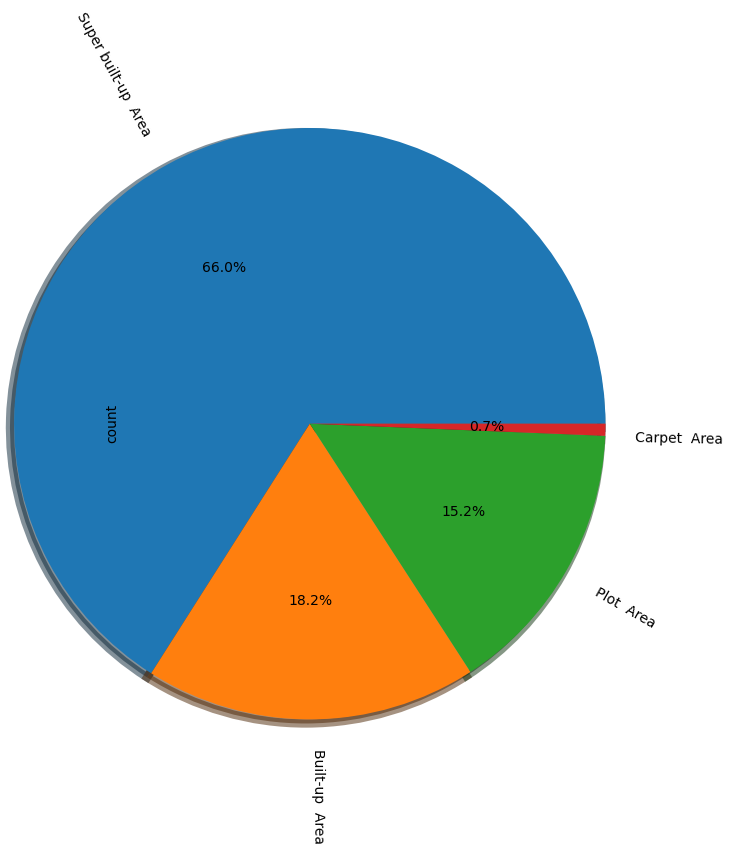

In [17]:
(data["area_type"].value_counts()).plot.pie(autopct="%.1f%%", shadow=True,rotatelabels=True, wedgeprops={'linewidth': 6}, radius=2)
plt.show()

<Axes: xlabel='availability'>

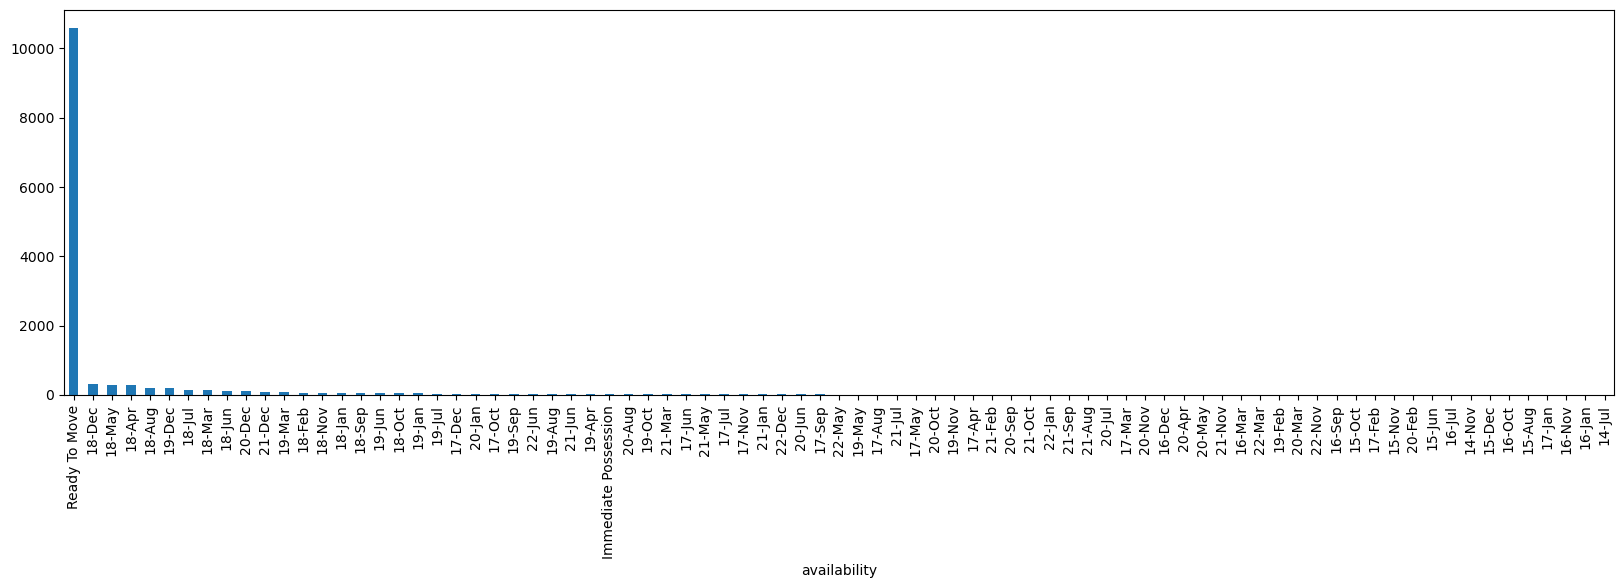

In [18]:
data['availability'].value_counts().plot(kind="bar", figsize=(20,5))

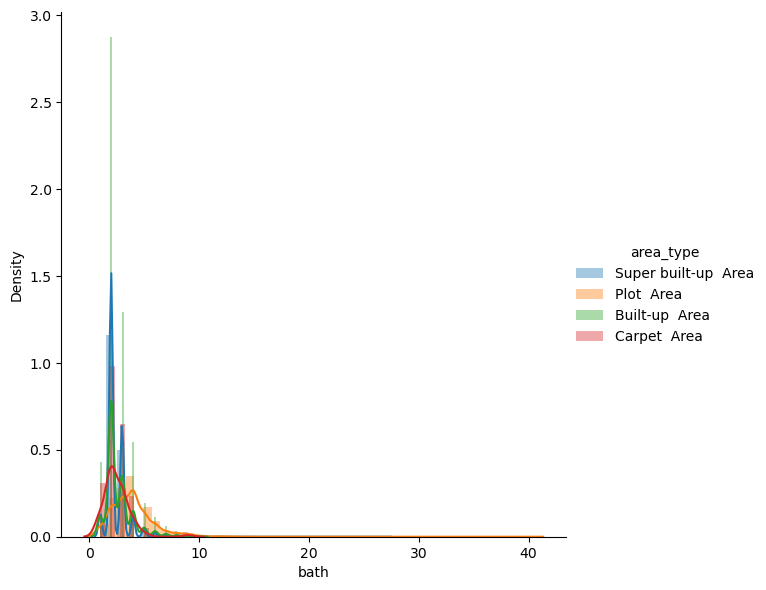

In [19]:
import warnings
warnings.filterwarnings('ignore')

sns.FacetGrid(data, hue='area_type', height=6).map(sns.distplot, 'bath').add_legend()
plt.show()

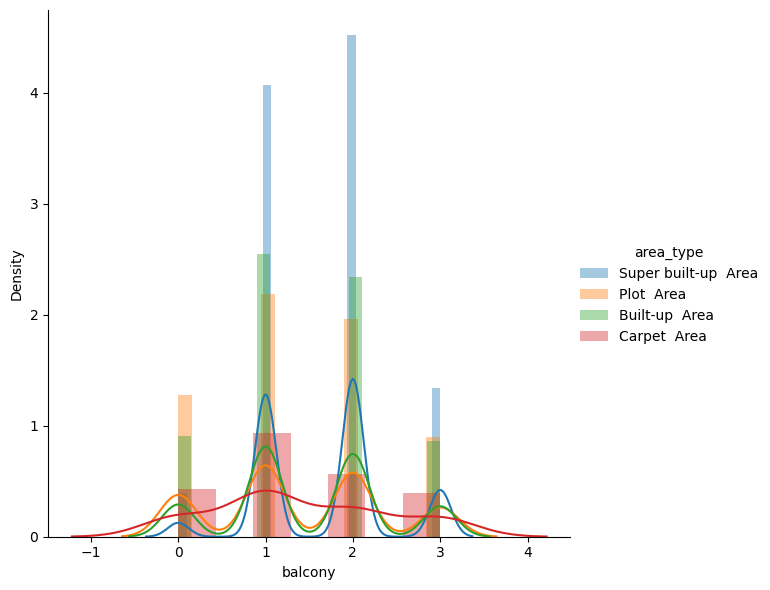

In [20]:
sns.FacetGrid(data, hue='area_type', height=6).map(sns.distplot, 'balcony').add_legend()
plt.show()

<Axes: xlabel='location'>

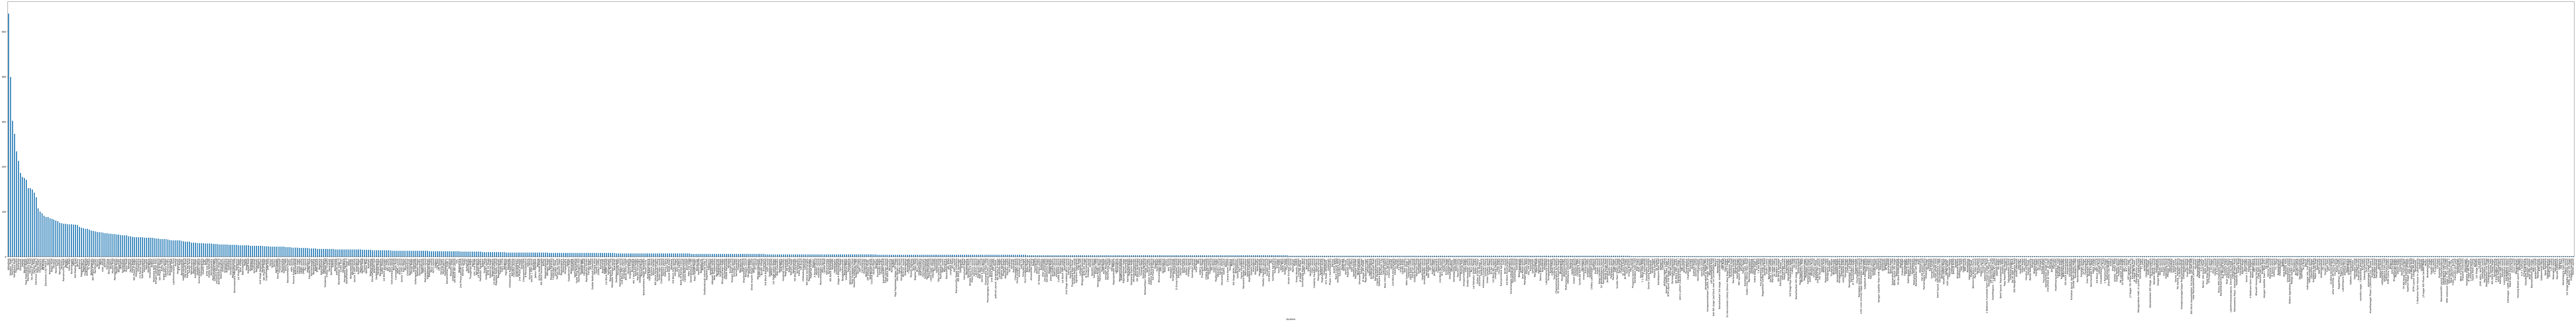

In [21]:
data['location'].value_counts().plot(kind="bar", figsize=(200,20))

<Axes: xlabel='size'>

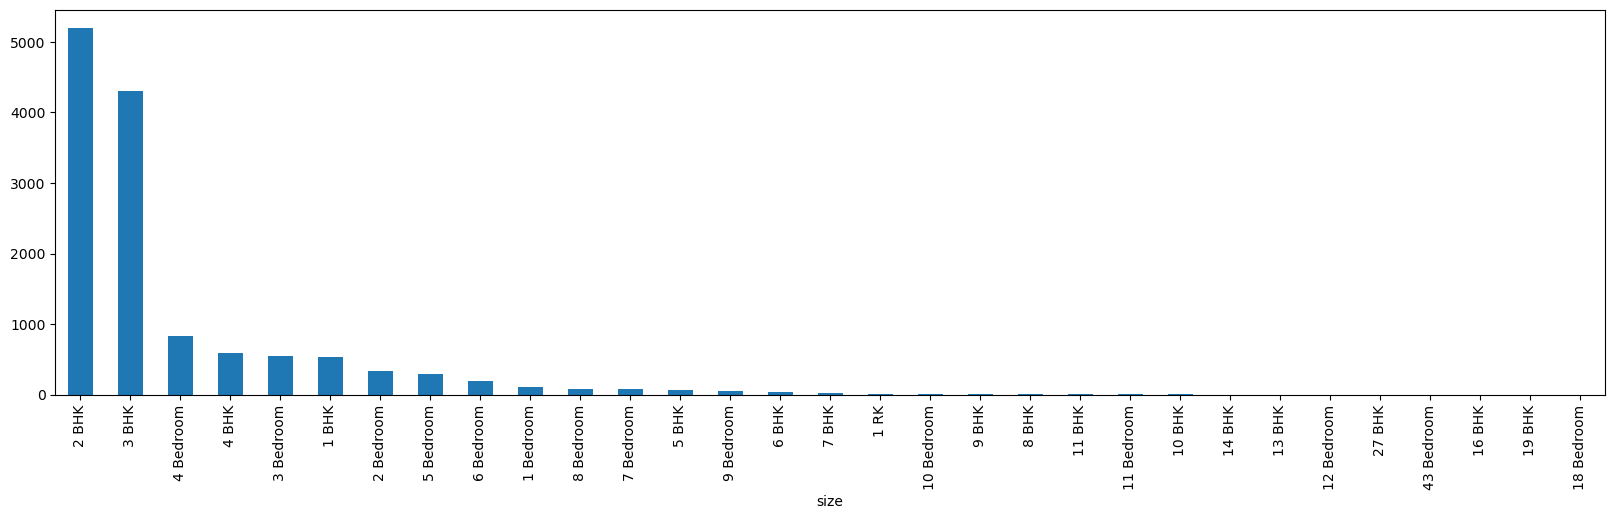

In [22]:
data['size'].value_counts().plot(kind="bar", figsize=(20,5))

<Axes: xlabel='total_sqft'>

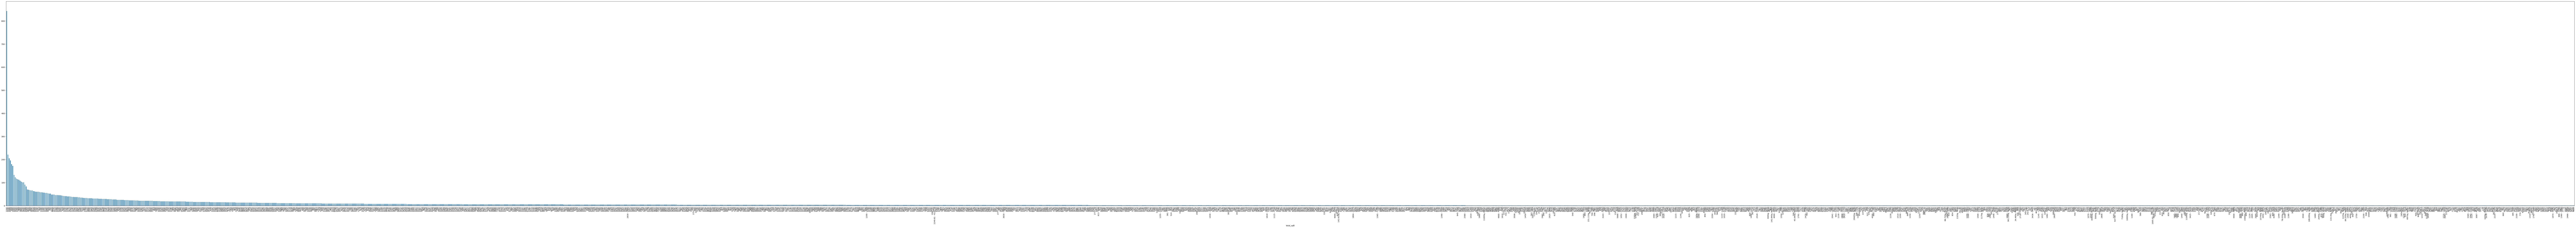

In [23]:
data['total_sqft'].value_counts().plot(kind="bar", figsize=(250,20))

# <center> Feature Engineering <center>

## Dropping Duplicate rows from the dataset

In [24]:
data.drop_duplicates(ignore_index=False, inplace=True)

In [25]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

## Transforming 'total_sqft' feature

In [26]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

##### We can see that some values specified as ranges, in such cases we will take mid value.

In [27]:
def convert_range(x):
    temp = x.split("-")
    if len(temp)==2:
        return (float(temp[1])+float(temp[0]))/2
    try:
        return float(x)
    except:
        return None

In [28]:
data['total_sqft']=data['total_sqft'].apply(convert_range)

In [29]:
data['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [30]:
data['total_sqft'].describe()

count    12706.000000
mean      1570.639375
std       1261.539128
min          1.000000
25%       1100.000000
50%       1282.000000
75%       1692.000000
max      52272.000000
Name: total_sqft, dtype: float64

##### We will replace any missing value with mean value

In [31]:
data['total_sqft'].fillna(data['total_sqft'].mean(), inplace=True)

##### Checking the distribution of column

Text(0, 0.5, 'Frequency')

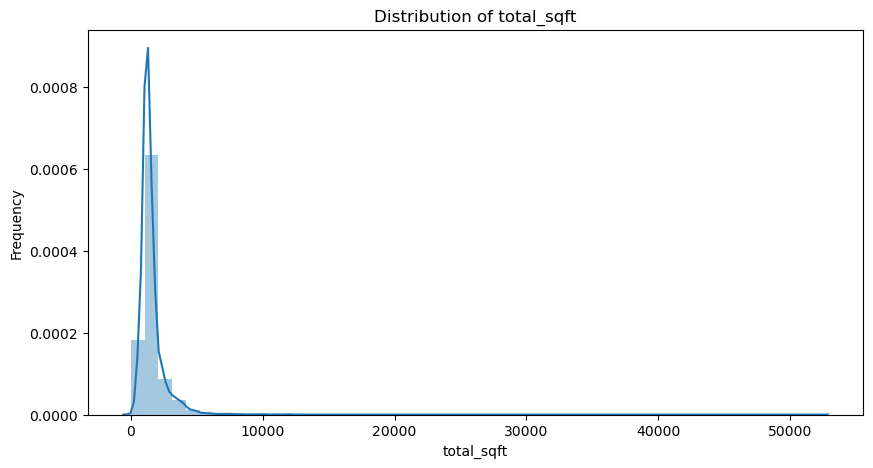

In [32]:
fig, axes = plt.subplots(1,1, figsize=(10,5))
sns.distplot(data['total_sqft'])
axes.set_title(f'Distribution of total_sqft')
axes.set_xlabel('total_sqft')
axes.set_ylabel('Frequency')

### Check the percentage of null values in column 'size'

In [33]:
data['size'].isna().mean() * 100

0.12547051442910914

In [34]:
data['size'].value_counts()

size
2 BHK         4904
3 BHK         4108
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

##### Replacing the missing values with most frequent value 

In [35]:
data['size'].fillna('2 BHK', inplace=True)

##### We see some values are recorded as 'BHK' and some as 'Bedroom'. Let's create a new feature called 'bhk'  by extracting numeric from the column values for consistency. 

In [36]:
data['bhk']=data['size'].str.split().str.get(0).astype(int)

In [37]:
data['bhk'].describe()

count    12752.000000
mean         2.818381
std          1.312792
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         43.000000
Name: bhk, dtype: float64

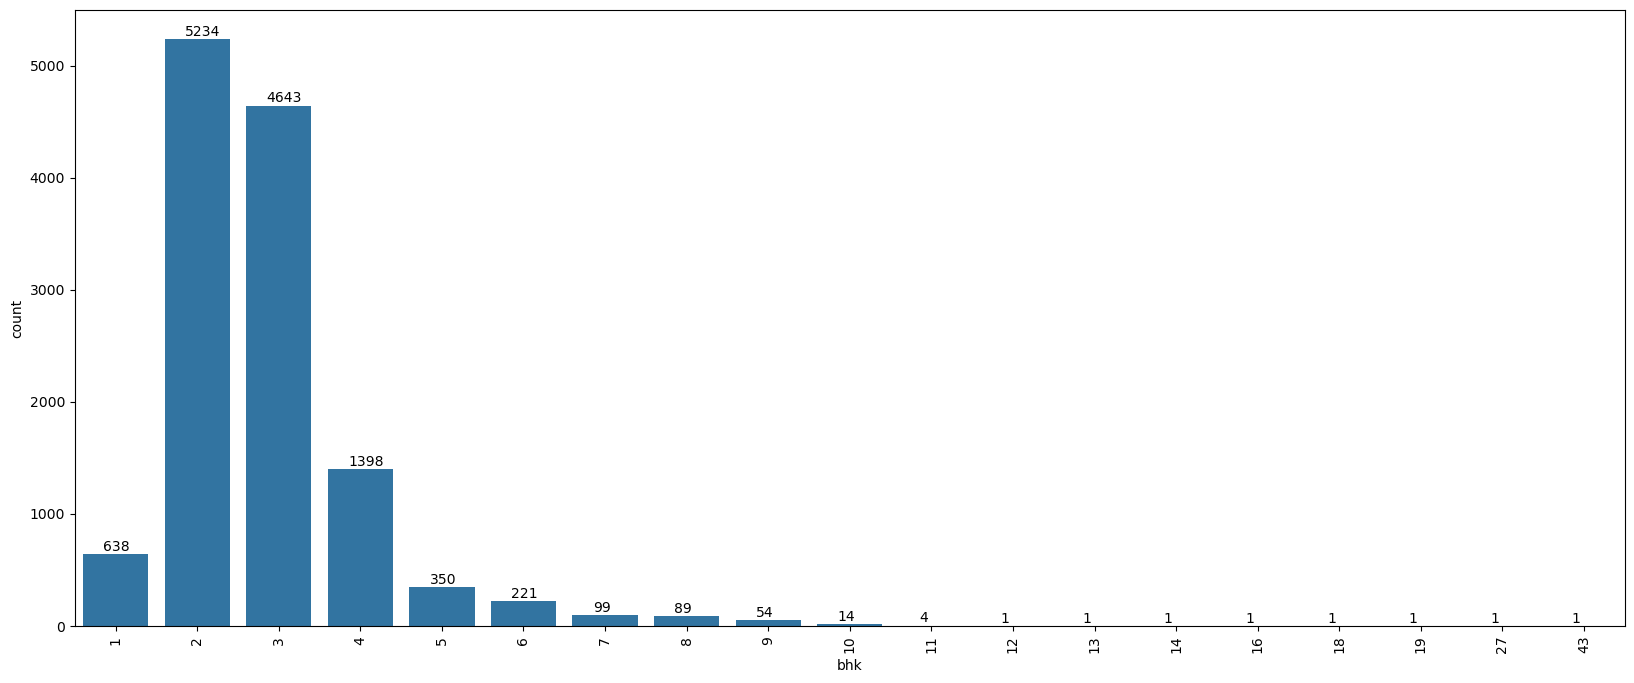

In [38]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'bhk', data = data)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

### Using mean imputation for 'bath' column

In [39]:
bath_med = data['bath'].mean()
data['bath'].fillna(bath_med, inplace=True)

In [40]:
data['bath'].describe()

count    12752.000000
mean         2.710387
std          1.355445
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64

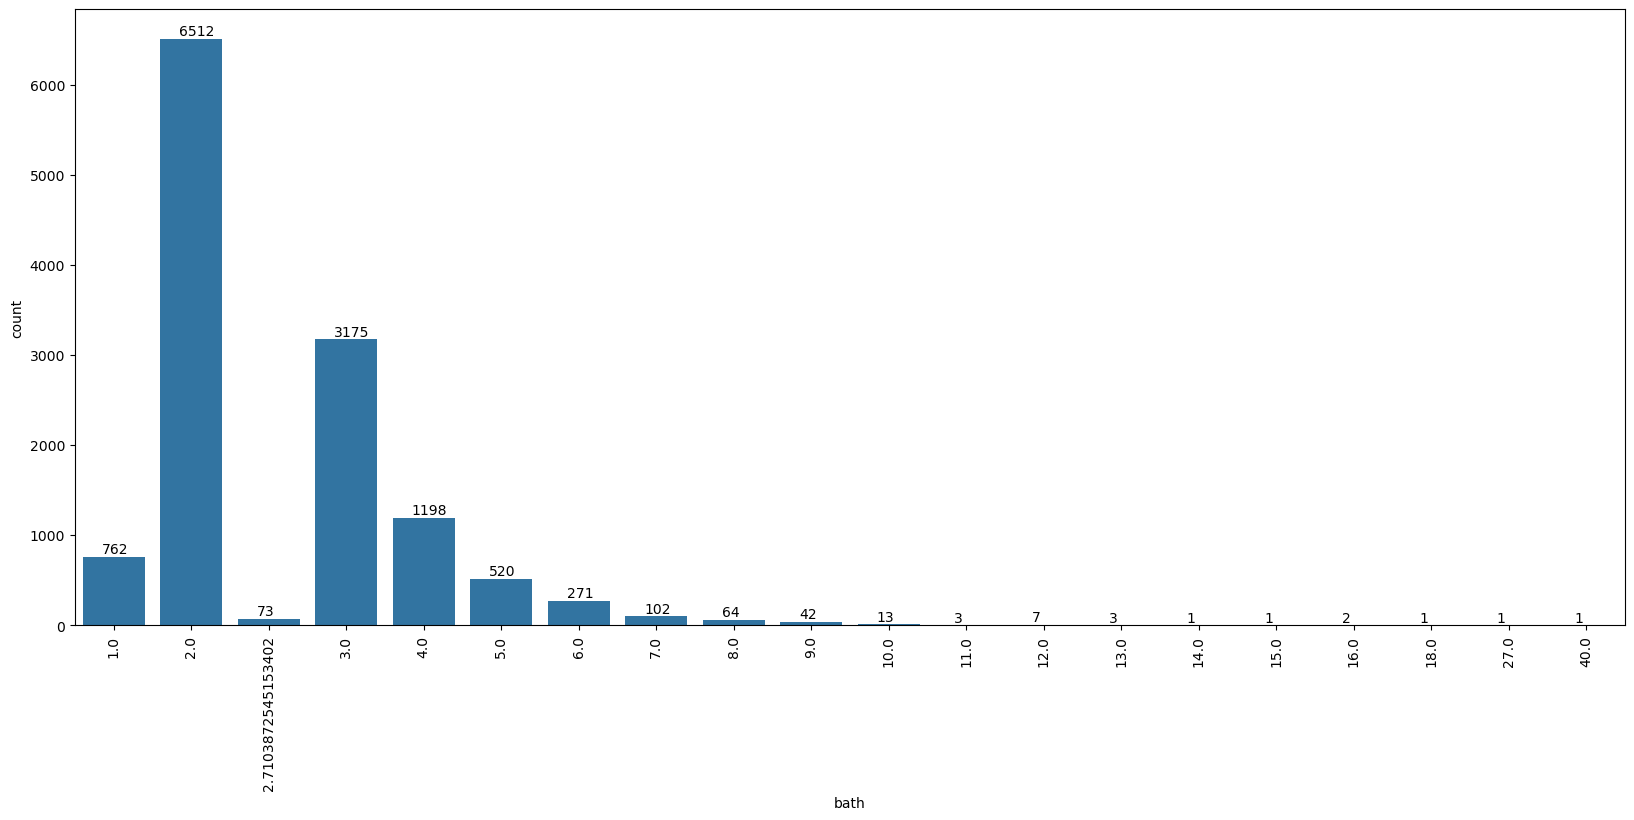

In [41]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'bath', data = data)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

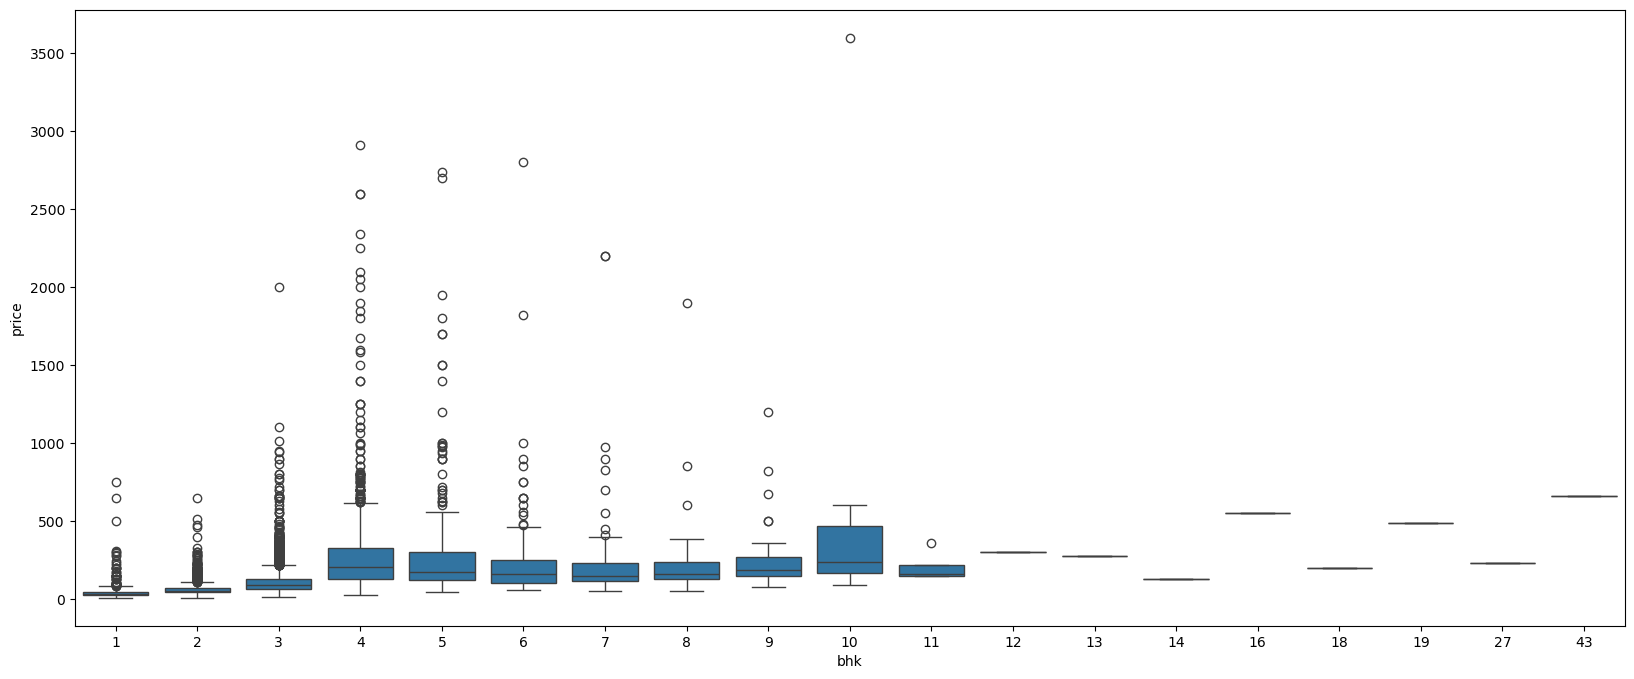

In [42]:
plt.figure(figsize = (20,8))
sns.boxplot(x = 'bhk', y = 'price', data = data)
plt.show()

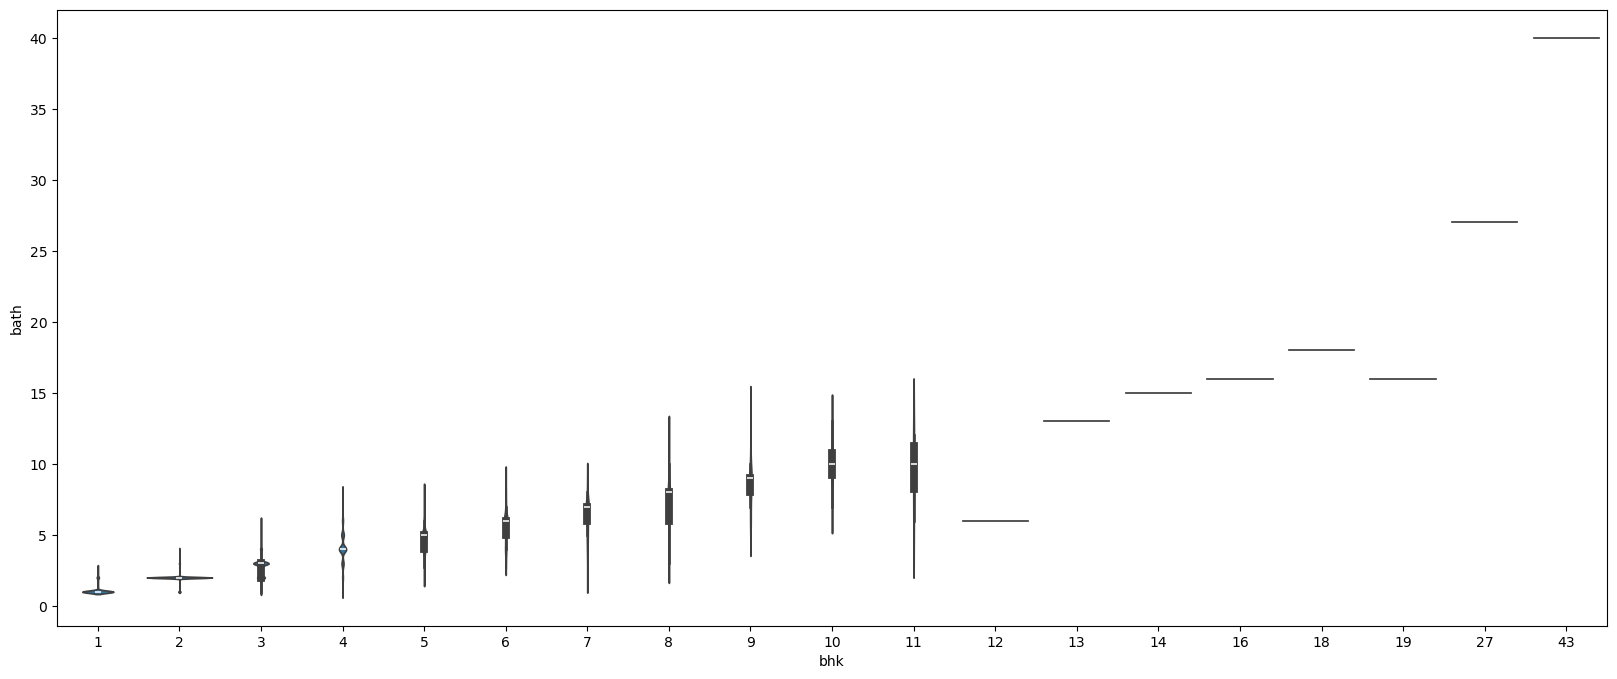

In [43]:
plt.figure(figsize = (20,8))
sns.violinplot(x='bhk', y = 'bath', data = data)
plt.show()

### Using mode imputation for 'balcony' column

In [44]:
mode = data.balcony.mode()[0]
data['balcony'].fillna(mode, inplace=True)

In [45]:
data['balcony'].describe()

count    12752.000000
mean         1.602337
std          0.808475
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

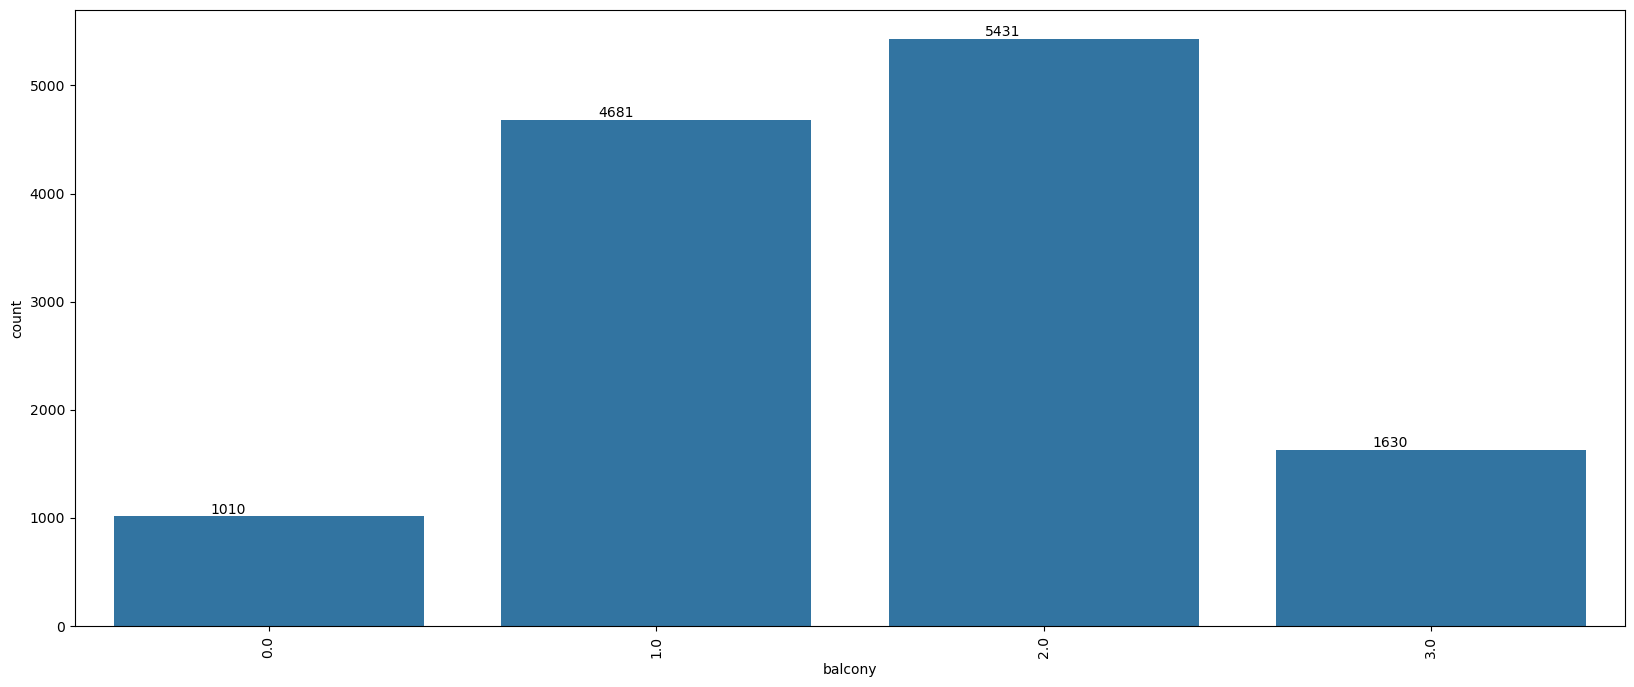

In [46]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'balcony', data = data)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

### Using mode imputation for 'balcony' column

In [47]:
location_mode = data['location'].mode()[0]
data['location'].fillna(location_mode, inplace=True)

In [48]:
data['location'].isna().sum()

0

In [49]:
data['location'] = data['location'].apply(lambda x: x.strip())
locations_count = data['location'].value_counts()

In [50]:
locations_count

location
Whitefield                        525
Sarjapur  Road                    379
Electronic City                   288
Kanakpura Road                    242
Thanisandra                       232
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1294, dtype: int64

#### Here, we are going to use Dimentionality Reduction for the data which are categorical variable. We need to apply Dimensionality Reduction here to reduce number of locations.

In [51]:
locations_count_less_10 = locations_count[locations_count<=10]
locations_count_less_10

location
Vasanthapura                      10
Sector 1 HSR Layout               10
BTM 1st Stage                     10
Nagappa Reddy Layout              10
Dodsworth Layout                  10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: count, Length: 1061, dtype: int64

In [52]:
data['location'] = data['location'].apply(lambda x: "other" if x in locations_count_less_10 else x)

In [53]:
data['location'].value_counts()

location
other               2930
Whitefield           525
Sarjapur  Road       379
Electronic City      288
Kanakpura Road       242
                    ... 
Kodigehalli           11
LB Shastri Nagar      11
Thyagaraja Nagar      11
Tindlu                11
HAL 2nd Stage         11
Name: count, Length: 234, dtype: int64

### Finding exact duplicates and dropping them

In [54]:
data.duplicated().sum()

65

In [55]:
data[data.duplicated()]['location'].value_counts()

location
other                  62
Kanakpura Road          1
Devarachikkanahalli     1
Yelenahalli             1
Name: count, dtype: int64

In [56]:
data.drop(index=[7726,8268,11530],axis=1,inplace=True)

In [57]:
data[data.duplicated()]['location'].value_counts()

location
other    62
Name: count, dtype: int64

##### In real estate, a reasonable benchmark is 300 square feet per bedroom. For instance, a 2 BHK apartment typically requires a minimum of 600 square feet. If a 2 BHK unit is listed with only 400 square feet, it raises suspicion as an unrealistic outlier.To refine our dataset, we will remove such anomalies by setting a minimum threshold of 300 square feet per bedroom. Any properties failing to meet this criterion will be excluded to ensure a more accurate analysis.

In [58]:
data[data.total_sqft/data.bhk<300].head()

area_type   availability             location       size  total_sqft  \
9   Plot  Area  Ready To Move                other  6 Bedroom      1020.0   
45  Plot  Area  Ready To Move           HSR Layout  8 Bedroom       600.0   
58  Plot  Area  Ready To Move        Murugeshpalya  6 Bedroom      1407.0   
68  Plot  Area  Ready To Move  Devarachikkanahalli  8 Bedroom      1350.0   
70  Plot  Area  Ready To Move                other  3 Bedroom       500.0   

    bath  balcony  price  bhk  
9    6.0      2.0  370.0    6  
45   9.0      2.0  200.0    8  
58   4.0      1.0  150.0    6  
68   7.0      0.0   85.0    8  
70   3.0      2.0  100.0    3

In [59]:
data = data[~(data.total_sqft/data.bhk<300)]
data.shape

(12011, 9)

In [60]:
data.describe()

total_sqft          bath       balcony         price           bhk
count  12011.000000  12011.000000  12011.000000  12011.000000  12011.000000
mean    1607.382076      2.578042      1.602864    113.520308      2.661977
std     1283.596647      1.091431      0.802456    154.917542      0.989942
min      300.000000      1.000000      0.000000      8.440000      1.000000
25%     1120.000000      2.000000      1.000000     50.000000      2.000000
50%     1310.000000      2.000000      2.000000     70.000000      3.000000
75%     1715.000000      3.000000      2.000000    120.000000      3.000000
max    52272.000000     16.000000      3.000000   3600.000000     16.000000

In [61]:
data["price_per_sqft"] = data["price"]*100000/data["total_sqft"]
data.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   total_sqft  bath  balcony   price  bhk  price_per_sqft  
0      1056.0   2.0      1.0   39.07    2     3699.810606  
1      2600.0   5.0      3.0  120.00    4     4615.384615  
2      1440.0   2.0      3.0   62.00    3     4305.555556  
3      1521.0   3.0      1.0   95.00    3     6245.890861  
4      1200.0   2.0      1.0   51.00    2     4250.000000

In [62]:
data['price_per_sqft'].describe()

count     12011.000000
mean       6377.422563
std        4247.574290
min         267.829813
25%        4250.000000
50%        5333.333333
75%        6984.710551
max      176470.588235
Name: price_per_sqft, dtype: float64

##### Here we find that min price per sqft is 267 rs/sqft whereas max is 170000, this shows a wide variation in property prices. We should remove outliers per location using mean and one Standard Deviation

In [63]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data = remove_pps_outliers(data)
data.shape

(9904, 10)

#### Ploting the Scatter Chart for 2 BHK and 3 BHK properties

In [64]:
import matplotlib

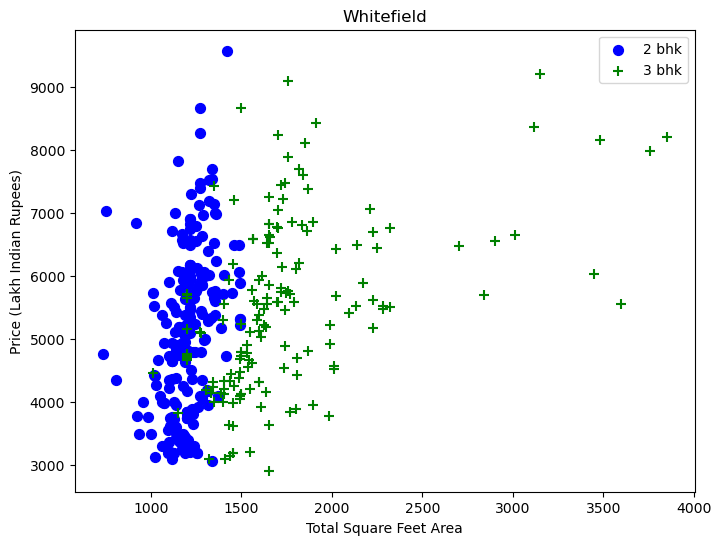

In [65]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (8,6)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 bhk', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+', color='green',label='3 bhk', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data,"Whitefield")

##### In any given location, price per sqft 3 bhk should not be less than mean price per sqft of 2 bhk. This holds true for all kinds of bhks. We will drop any such observations that does not hold this fact.

In [66]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std'  : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [67]:
data = bhk_outlier_remover(data)
data.shape

(7032, 10)

Text(0, 0.5, 'Count')

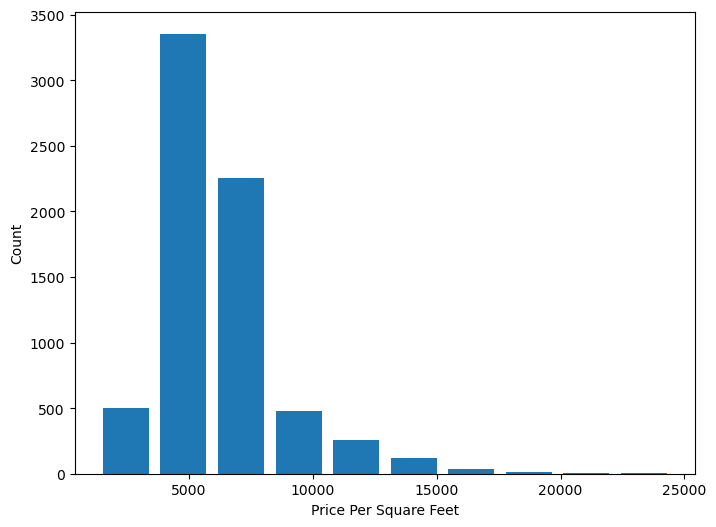

In [68]:
plt.hist(data.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

#### Ploting the histogram for Number of bathrooms vs Count

Text(0, 0.5, 'Count')

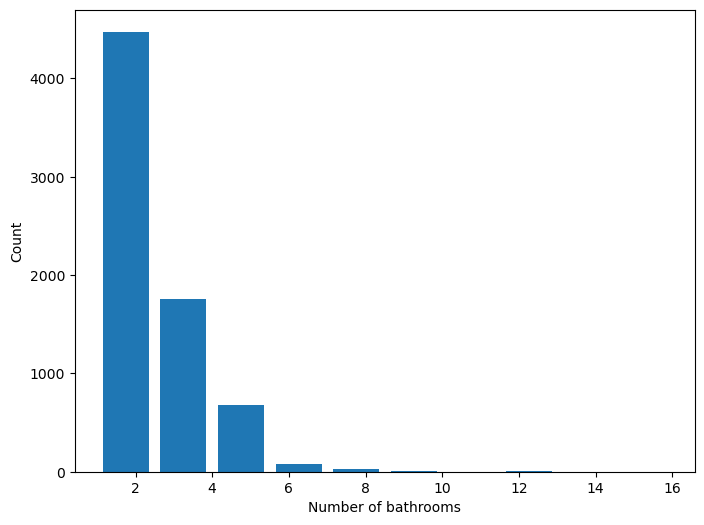

In [69]:
plt.hist(data.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [70]:
data[data.bath>10]

area_type   availability        location    size  total_sqft  \
5029  Super built-up  Area  Ready To Move  Neeladri Nagar  10 BHK      4000.0   
8115  Super built-up  Area  Ready To Move           other  10 BHK     12000.0   
8210  Super built-up  Area  Ready To Move           other  16 BHK     10000.0   
8956  Super built-up  Area  Ready To Move           other  11 BHK      6000.0   
9299  Super built-up  Area  Ready To Move           other  13 BHK      5425.0   

      bath  balcony  price  bhk  price_per_sqft  
5029  12.0      2.0  160.0   10     4000.000000  
8115  12.0      2.0  525.0   10     4375.000000  
8210  16.0      2.0  550.0   16     5500.000000  
8956  12.0      2.0  150.0   11     2500.000000  
9299  13.0      0.0  275.0   13     5069.124424

#### It is unusual to have 2 more bathrooms than number of bedrooms in a home. So we are discarding that also.

In [71]:
data=data[~(data.bath>data.bhk+2)]

In [72]:
data.shape

(7028, 10)

In [73]:
data.drop(columns=['price_per_sqft'], inplace=True)

## Multivariate Analysis

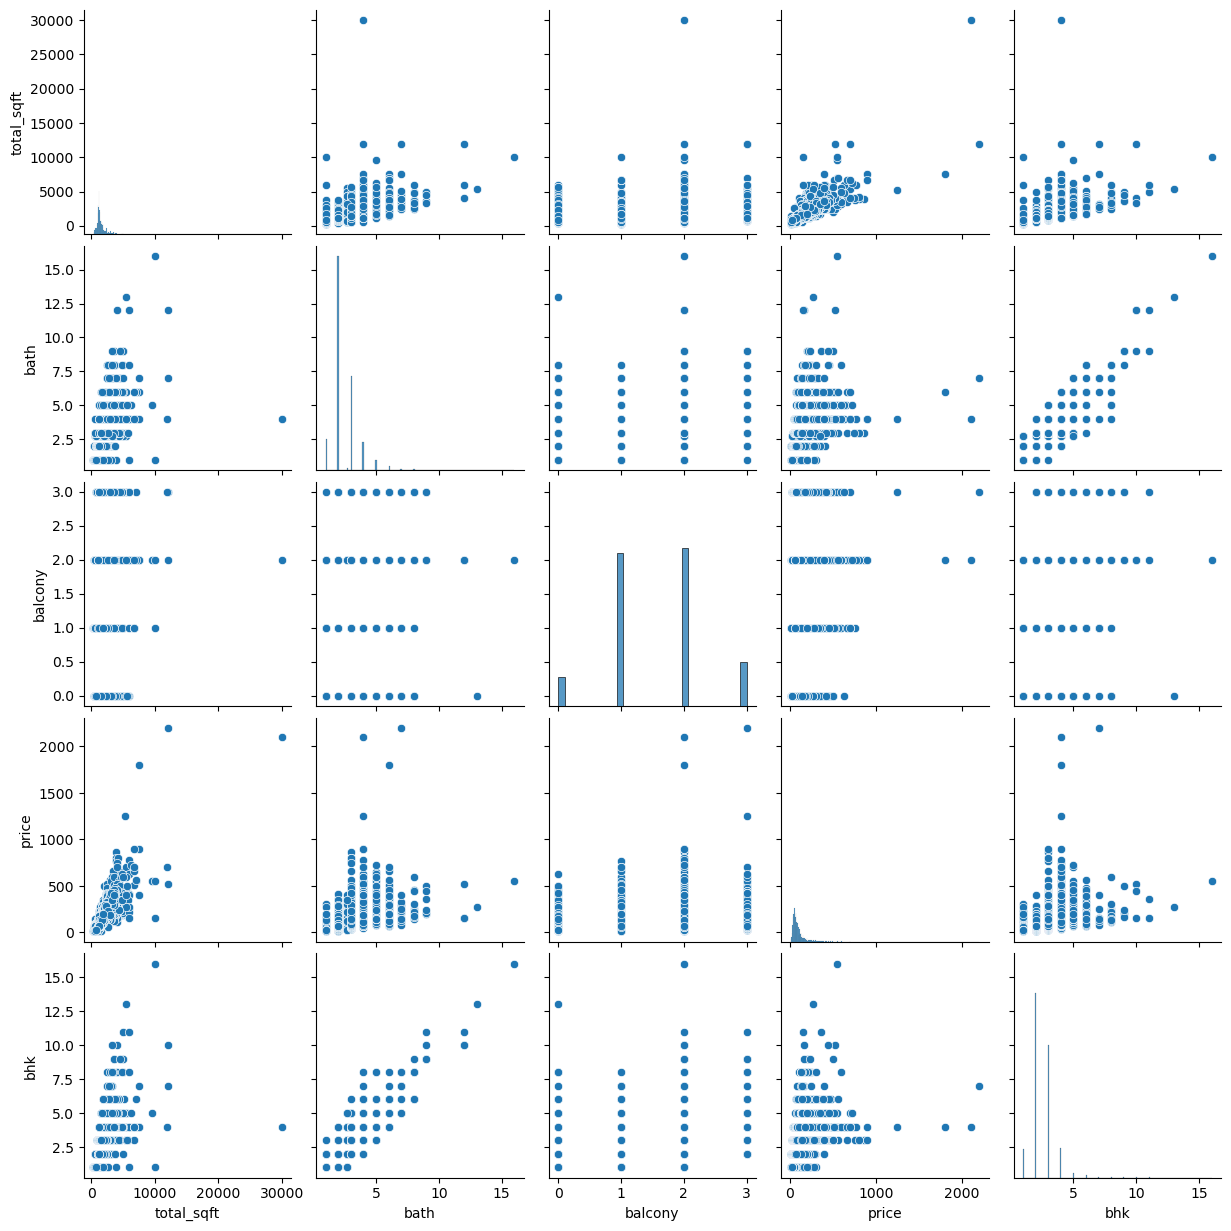

In [74]:
sns.pairplot(data)

<Axes: >

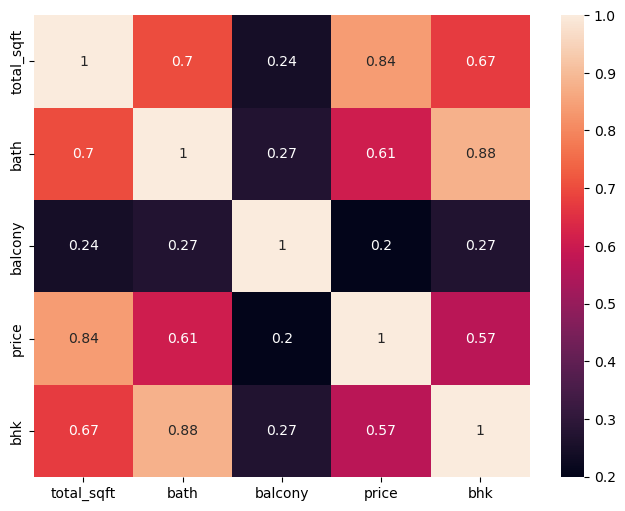

In [79]:
data_numeric = data.select_dtypes(include=[np.number])
correlation = data_numeric.corr()
sns.heatmap(correlation, annot=True)

##### From above plots we see some linear relationship exists between price and features total_sqft, bhk, bath

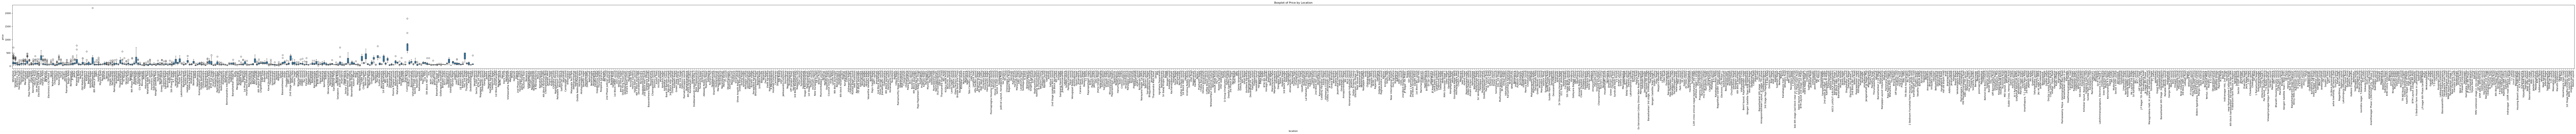

In [80]:
plt.figure(figsize = (200,5))
sns.boxplot(x='location', y='price', data=data, order = locations_count.index)
plt.xticks(rotation=90) 
plt.title('Boxplot of Price by Location')
plt.show()

In [81]:
location_price = data[['location','price']].groupby('location')['price'].median().reset_index()

In [82]:
location_price = location_price.rename(columns={'price': 'median_price'})
location_price.head()

location  median_price
0   1st Block Jayanagar         235.0
1    1st Phase JP Nagar          96.5
2  2nd Stage Nagarbhavi         227.5
3  5th Block Hbr Layout          69.5
4    5th Phase JP Nagar          60.0

In [83]:
sorted_data = location_price.sort_values(by='median_price', ascending=False)

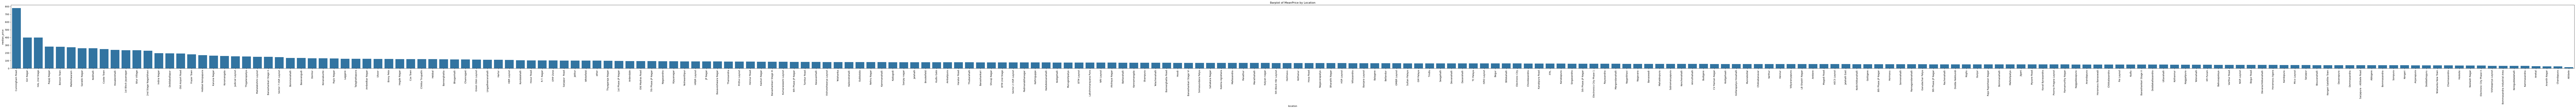

In [84]:
plt.figure(figsize = (200,5))
sns.barplot(x='location', y='median_price', data=sorted_data)
plt.xticks(rotation=90) 
plt.title('Barplot of MeanPrice by Location')
plt.show()

##### Prices vary with location and hence we reatin this feature for the model building

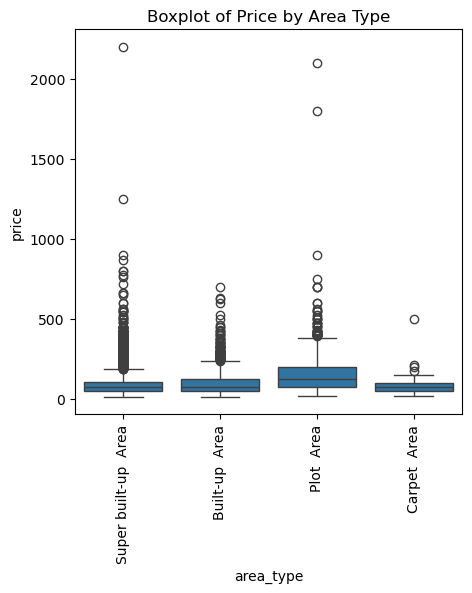

In [85]:
plt.figure(figsize = (5,5))
sns.boxplot(x='area_type', y='price', data=data)
plt.xticks(rotation=90) 
plt.title('Boxplot of Price by Area Type')
plt.show()

In [86]:
area_type_mean_price=data.groupby('area_type')['price'].mean().sort_values(ascending=False).reset_index()
area_type_mean_price

area_type       price
0            Plot  Area  162.812664
1        Built-up  Area  100.471846
2  Super built-up  Area   93.944813
3          Carpet  Area   89.714286

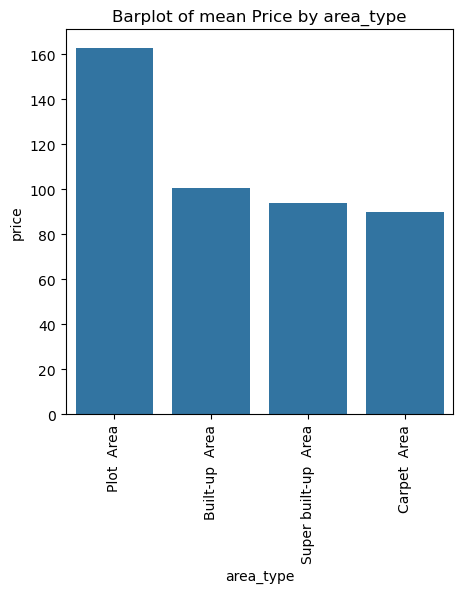

In [87]:
plt.figure(figsize = (5,5))
sns.barplot(x='area_type', y='price', data=area_type_mean_price)
plt.xticks(rotation=90) 
plt.title('Barplot of mean Price by area_type')
plt.show()

In [88]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway


# Perform ANOVA
anova_result = f_oneway(*[data['price'][data['area_type'] == group] for group in data['area_type'].unique()])
print(f"ANOVA p-value: {anova_result.pvalue}")

if anova_result.pvalue < 0.05:  # Check significance
    # Perform Tukey-Kramer test
    tukey_result = pairwise_tukeyhsd(data['price'], data['area_type'])
    print(tukey_result)
else:
    print("No significant differences between groups.")


ANOVA p-value: 4.8657965610525425e-65
            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
    group1            group2        meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------
Built-up  Area         Carpet  Area -10.7576 0.8806 -48.0689  26.5537  False
Built-up  Area           Plot  Area  62.3408    0.0  50.7951  73.8865   True
Built-up  Area Super built-up  Area   -6.527 0.1016 -13.8675   0.8134  False
  Carpet  Area           Plot  Area  73.0984    0.0  35.1484 111.0484   True
  Carpet  Area Super built-up  Area   4.2305 0.9911 -32.6583  41.1193  False
    Plot  Area Super built-up  Area -68.8679    0.0 -78.9651 -58.7706   True
----------------------------------------------------------------------------


##### From above bar plot and anova results, we can conclude that there is not much variation in the mean price of different area types and hence we can drop the area type feature

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7028 entries, 0 to 9903
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7028 non-null   object 
 1   availability  7028 non-null   object 
 2   location      7028 non-null   object 
 3   size          7028 non-null   object 
 4   total_sqft    7028 non-null   float64
 5   bath          7028 non-null   float64
 6   balcony       7028 non-null   float64
 7   price         7028 non-null   float64
 8   bhk           7028 non-null   int32  
dtypes: float64(4), int32(1), object(4)
memory usage: 521.6+ KB


### Dropping unimportant features

In [90]:
data = data.drop(columns=['area_type', 'availability', 'size','balcony'])

In [91]:
for col in ['total_sqft', 'bath', 'price']:
    data[col] = np.where(data[col] > data[col].quantile(0.99), data[col].quantile(0.99), data[col])

In [92]:
data.columns

Index(['location', 'total_sqft', 'bath', 'price', 'bhk'], dtype='object')

In [93]:
data.shape

(7028, 5)

## Cleaned_data

In [94]:
data.head()

location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3
3  1st Block Jayanagar      1200.0   2.0  130.0    3
4  1st Block Jayanagar      1235.0   2.0  148.0    2

In [95]:
data.shape

(7028, 5)

In [96]:
data.to_csv("Cleaned_data_practice3.csv", index=None)

## Training the Model

In [97]:
X=data.drop(columns=['price'])
y=data['price']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0) 

In [99]:
print(X_train.shape)
print(X_test.shape)

(5973, 4)
(1055, 4)


In [100]:
X_train.columns

Index(['location', 'total_sqft', 'bath', 'bhk'], dtype='object')

In [101]:
X_train

location  total_sqft  bath  bhk
7944              other      1350.0   2.0    2
2707             Hebbal      1075.0   2.0    2
4997         Nagasandra      2400.0   4.0    4
4683       Malleshwaram      2215.0   3.0    3
831   Bannerghatta Road      1532.5   3.0    3
...                 ...         ...   ...  ...
6121  Somasundara Palya      1200.0   2.0    2
4050       Kasavanhalli      4260.0   4.0    4
2049    Electronic City      1360.0   2.0    3
3187            Hoskote      1095.0   2.0    2
3333       Indira Nagar      4000.0   4.0    4

[5973 rows x 4 columns]

In [102]:
y_train

7944    185.00
2707     52.00
4997    145.00
4683    275.00
831      84.29
         ...  
6121     75.00
4050    272.00
2049     64.99
3187     33.60
3333    443.65
Name: price, Length: 5973, dtype: float64

In [103]:
X_test.shape

(1055, 4)

In [104]:
y_test

5200     50.79
1033     60.00
724      47.57
6772     67.32
3418    111.00
         ...  
6055    142.00
4603     50.00
1780    163.00
8239    140.00
7866    176.00
Name: price, Length: 1055, dtype: float64

In [105]:
print("Missing values in X_train:", X_train.isnull().sum())
print("Missing values in y_train:", y_train.isnull().sum())
print("Min of y_train:", y_test.min())

Missing values in X_train: location      0
total_sqft    0
bath          0
bhk           0
dtype: int64
Missing values in y_train: 0
Min of y_train: 12.0


## Linear Regression

In [107]:


# Define Columns
num_cols = ['total_sqft', 'bath', 'bhk']  # Numerical columns to log transform
cat_cols = ['location']  # Categorical columns to one-hot encode

# ColumnTransformer for Preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('num_log', FunctionTransformer(np.log1p, validate=True), num_cols),  # Log transform for numerical columns
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)

# Standard Scaler
scaler = StandardScaler()

# XGBoost Regressor with Tuned Hyperparameters
model = LinearRegression()

# Pipeline for Preprocessing and Model
pipe = Pipeline([
    ('column_trans', column_trans),  # Apply ColumnTransformer
    ('scaler', scaler),              # Scale numerical features
#     ('pca', PCA(n_components=2)), 
    ('model', model)                   # Train XGBoost Regressor
])

# TransformedTargetRegressor to Log Transform Target Variable (y)
regressor = TransformedTargetRegressor(
    regressor=pipe,                  # Use the pipeline as the base model
    func=np.log1p,                   # Log transform for y
    inverse_func=np.expm1            # Inverse transform for predictions
)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# Perform Cross-Validation
r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# Display Cross-Validation Results
print(f'R2 Scores (per fold): {r2_scores}')
print(f'Average R2 Score: {np.nanmean(r2_scores):.4f}')
print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
print(f'Average MAE: {-np.nanmean(mae_scores):.4f}')

# Fit the Model on Entire Training Data (if needed for final model)
regressor.fit(X_train, y_train)

# Predictions on Test Data
y_pred = regressor.predict(X_test)

# Evaluation on Test Set
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Test R2 Score: {test_r2:.4f}')
print(f'Test MAE: {test_mae:.4f}')

R2 Scores (per fold): [0.89477198 0.86604682 0.90246844 0.90052186 0.86924186]
Average R2 Score: 0.8866
MAE Scores (per fold): [14.00885801 16.81913269 14.09882679 14.4125466  15.84079499]
Average MAE: 15.0360
Test R2 Score: 0.9000
Test MAE: 14.4859


## Lasso Regression

In [108]:
# Function for Log Transformation
def log_transform(X):
    return np.log(X)  # log1p to handle zero values safely

# Log Transformer for Numerical Columns
log_transformer = FunctionTransformer(log_transform)

# Define Columns
num_cols = ['total_sqft', 'bath', 'bhk']  # Numerical columns to log transform
cat_cols = ['location']  # Categorical columns to one-hot encode

# ColumnTransformer for Preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('num_log', FunctionTransformer(np.log1p, validate=True), num_cols),  # Log transform for numerical columns
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)

# Standard Scaler
scaler = StandardScaler()

# Lasso Regressor with Tuned Hyperparameters
model = Lasso(alpha=0.001)

# Pipeline for Preprocessing and Model
pipe = Pipeline([
    ('column_trans', column_trans),  # Apply ColumnTransformer
    ('scaler', scaler),              # Scale numerical features
#     ('pca', PCA(n_components=2)), 
    ('model', model)                   # Train XGBoost Regressor
])

# TransformedTargetRegressor to Log Transform Target Variable (y)
regressor = TransformedTargetRegressor(
    regressor=pipe,                  # Use the pipeline as the base model
    func=np.log,                   # Log transform for y
    inverse_func=np.expm1            # Inverse transform for predictions
)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# Perform Cross-Validation
r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# Display Cross-Validation Results
print(f'R2 Scores (per fold): {r2_scores}')
print(f'Average R2 Score: {np.nanmean(r2_scores):.4f}')
print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
print(f'Average MAE: {-np.nanmean(mae_scores):.4f}')

# Fit the Model on Entire Training Data (if needed for final model)
regressor.fit(X_train, y_train)

# Predictions on Test Data
y_pred = regressor.predict(X_test)

# Evaluation on Test Set
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Test R2 Score: {test_r2:.4f}')
print(f'Test MAE: {test_mae:.4f}')

R2 Scores (per fold): [0.89371566 0.86369461 0.88794583 0.89809765 0.86958688]
Average R2 Score: 0.8826
MAE Scores (per fold): [13.9377504  17.01780639 14.37748684 14.48485338 15.78462369]
Average MAE: 15.1205
Test R2 Score: 0.8903
Test MAE: 14.7496


## Ridge Regression

In [109]:
# Function for Log Transformation
def log_transform(X):
    return np.log(X)  # log1p to handle zero values safely

# Log Transformer for Numerical Columns
log_transformer = FunctionTransformer(log_transform)

# Define Columns
num_cols = ['total_sqft', 'bath', 'bhk']  # Numerical columns to log transform
cat_cols = ['location']  # Categorical columns to one-hot encode

# ColumnTransformer for Preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('num_log', FunctionTransformer(np.log1p, validate=True), num_cols),  # Log transform for numerical columns
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)

# Standard Scaler
scaler = StandardScaler()

# Ridge Regressor with Tuned Hyperparameters
model = Ridge()

# Pipeline for Preprocessing and Model
pipe = Pipeline([
    ('column_trans', column_trans),  # Apply ColumnTransformer
    ('scaler', scaler),              # Scale numerical features
#     ('pca', PCA(n_components=2)), 
    ('model', model)                   # Train XGBoost Regressor
])

# TransformedTargetRegressor to Log Transform Target Variable (y)
regressor = TransformedTargetRegressor(
    regressor=pipe,                  # Use the pipeline as the base model
    func=np.log,                   # Log transform for y
    inverse_func=np.expm1            # Inverse transform for predictions
)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# Perform Cross-Validation
r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# Display Cross-Validation Results
print(f'R2 Scores (per fold): {r2_scores}')
print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# Fit the Model on Entire Training Data (if needed for final model)
regressor.fit(X_train, y_train)

# Predictions on Test Data
y_pred = regressor.predict(X_test)

# Evaluation on Test Set
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Test R2 Score: {test_r2:.4f}')
print(f'Test MAE: {test_mae:.4f}')

R2 Scores (per fold): [0.89381586 0.86404519 0.89957628 0.89947592 0.86688616]
Average R2 Score: 0.8848
MAE Scores (per fold): [14.01936212 16.8817662  14.16763655 14.38757334 15.85262738]
Average MAE: 15.0618
Test R2 Score: 0.8988
Test MAE: 14.5083


## Using KNN Regressor

In [110]:
# Function for Log Transformation
def log_transform(X):
    return np.log(X)  # log1p to handle zero values safely

# Log Transformer for Numerical Columns
log_transformer = FunctionTransformer(log_transform)

# Define Columns
num_cols = ['total_sqft', 'bath', 'bhk']  # Numerical columns to log transform
cat_cols = ['location']  # Categorical columns to one-hot encode

# ColumnTransformer for Preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('num_log', FunctionTransformer(np.log1p, validate=True), num_cols),  # Log transform for numerical columns
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)

# Standard Scaler
scaler = StandardScaler()

# Decision Tree Regressor with Tuned Hyperparameters
model = KNeighborsRegressor(n_neighbors=5)

# Pipeline for Preprocessing and Model
pipe = Pipeline([
    ('column_trans', column_trans),  # Apply ColumnTransformer
    ('scaler', scaler),              # Scale numerical features
#     ('pca', PCA(n_components=2)), 
    ('model', model)                   # Train XGBoost Regressor
])

# TransformedTargetRegressor to Log Transform Target Variable (y)
regressor = TransformedTargetRegressor(
    regressor=pipe,                  # Use the pipeline as the base model
    func=np.log,                   # Log transform for y
    inverse_func=np.expm1            # Inverse transform for predictions
)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# Perform Cross-Validation
r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# Display Cross-Validation Results
print(f'R2 Scores (per fold): {r2_scores}')
print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# Fit the Model on Entire Training Data (if needed for final model)
regressor.fit(X_train, y_train)

# Predictions on Test Data
y_pred = regressor.predict(X_test)

# Evaluation on Test Set
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Test R2 Score: {test_r2:.4f}')
print(f'Test MAE: {test_mae:.4f}')

R2 Scores (per fold): [0.80745743 0.79118746 0.81660843 0.77188337 0.81677485]
Average R2 Score: 0.8008
MAE Scores (per fold): [17.8061545  20.88112209 18.91737548 19.63877808 18.87261939]
Average MAE: 19.2232
Test R2 Score: 0.8256
Test MAE: 18.2265


## Using SVR

In [111]:
# Function for Log Transformation
def log_transform(X):
    return np.log(X)  # log1p to handle zero values safely

# Log Transformer for Numerical Columns
log_transformer = FunctionTransformer(log_transform)

# Define Columns
num_cols = ['total_sqft', 'bath', 'bhk']  # Numerical columns to log transform
cat_cols = ['location']  # Categorical columns to one-hot encode

# ColumnTransformer for Preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('num_log', FunctionTransformer(np.log1p, validate=True), num_cols),  # Log transform for numerical columns
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)

# Standard Scaler
scaler = StandardScaler()

# Decision Tree Regressor with Tuned Hyperparameters
model = SVR(kernel='rbf',C=10000,epsilon=0.2)

# Pipeline for Preprocessing and Model
pipe = Pipeline([
    ('column_trans', column_trans),  # Apply ColumnTransformer
    ('scaler', scaler),              # Scale numerical features
#     ('pca', PCA(n_components=2)), 
    ('model', model)                   # Train XGBoost Regressor
])

# TransformedTargetRegressor to Log Transform Target Variable (y)
regressor = TransformedTargetRegressor(
    regressor=pipe,                  # Use the pipeline as the base model
    func=np.log,                   # Log transform for y
    inverse_func=np.expm1            # Inverse transform for predictions
)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# Perform Cross-Validation
r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# Display Cross-Validation Results
print(f'R2 Scores (per fold): {r2_scores}')
print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# Fit the Model on Entire Training Data (if needed for final model)
regressor.fit(X_train, y_train)

# Predictions on Test Data
y_pred = regressor.predict(X_test)

# Evaluation on Test Set
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Test R2 Score: {test_r2:.4f}')
print(f'Test MAE: {test_mae:.4f}')

R2 Scores (per fold): [0.69605954 0.83003552 0.85355225 0.73975118 0.74583134]
Average R2 Score: 0.7730
MAE Scores (per fold): [16.73624921 19.05380369 16.77742679 17.7879208  18.40946448]
Average MAE: 17.7530
Test R2 Score: 0.8028
Test MAE: 16.7498


## Using Decision Tree Regressor

In [112]:
# Function for Log Transformation
def log_transform(X):
    return np.log(X)  # log1p to handle zero values safely

# Log Transformer for Numerical Columns
log_transformer = FunctionTransformer(log_transform)

# Define Columns
num_cols = ['total_sqft', 'bath', 'bhk']  # Numerical columns to log transform
cat_cols = ['location']  # Categorical columns to one-hot encode

# ColumnTransformer for Preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('num_log', FunctionTransformer(np.log1p, validate=True), num_cols),  # Log transform for numerical columns
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)

# Standard Scaler
scaler = StandardScaler()

# Decision Tree Regressor with Tuned Hyperparameters
model = DecisionTreeRegressor(max_depth=8)

# Pipeline for Preprocessing and Model
pipe = Pipeline([
    ('column_trans', column_trans),  # Apply ColumnTransformer
    ('scaler', scaler),              # Scale numerical features
#     ('pca', PCA(n_components=2)), 
    ('model', model)                   # Train XGBoost Regressor
])

# TransformedTargetRegressor to Log Transform Target Variable (y)
regressor = TransformedTargetRegressor(
    regressor=pipe,                  # Use the pipeline as the base model
    func=np.log,                   # Log transform for y
    inverse_func=np.expm1            # Inverse transform for predictions
)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# Perform Cross-Validation
r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# Display Cross-Validation Results
print(f'R2 Scores (per fold): {r2_scores}')
print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# Fit the Model on Entire Training Data (if needed for final model)
regressor.fit(X_train, y_train)

# Predictions on Test Data
y_pred = regressor.predict(X_test)

# Evaluation on Test Set
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Test R2 Score: {test_r2:.4f}')
print(f'Test MAE: {test_mae:.4f}')

R2 Scores (per fold): [0.8112537  0.80492726 0.79820492 0.79619474 0.80063842]
Average R2 Score: 0.8022
MAE Scores (per fold): [19.02577216 21.87129232 20.25378402 19.59718499 20.32112094]
Average MAE: 20.2138
Test R2 Score: 0.8160
Test MAE: 20.3995


## Using Random Forest Regressor

In [113]:
# Function for Log Transformation
def log_transform(X):
    return np.log(X)  # log1p to handle zero values safely

# Log Transformer for Numerical Columns
log_transformer = FunctionTransformer(log_transform)

# Define Columns
num_cols = ['total_sqft', 'bath', 'bhk']  # Numerical columns to log transform
cat_cols = ['location']  # Categorical columns to one-hot encode

# ColumnTransformer for Preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('num_log', FunctionTransformer(np.log1p, validate=True), num_cols),  # Log transform for numerical columns
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)

# Standard Scaler
scaler = StandardScaler()

# Decision Tree Regressor with Tuned Hyperparameters
model = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

# Pipeline for Preprocessing and Model
pipe = Pipeline([
    ('column_trans', column_trans),  # Apply ColumnTransformer
    ('scaler', scaler),              # Scale numerical features
#     ('pca', PCA(n_components=2)), 
    ('model', model)                   # Train XGBoost Regressor
])

# TransformedTargetRegressor to Log Transform Target Variable (y)
regressor = TransformedTargetRegressor(
    regressor=pipe,                  # Use the pipeline as the base model
    func=np.log,                   # Log transform for y
    inverse_func=np.expm1            # Inverse transform for predictions
)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# Perform Cross-Validation
r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# Display Cross-Validation Results
print(f'R2 Scores (per fold): {r2_scores}')
print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# Fit the Model on Entire Training Data (if needed for final model)
regressor.fit(X_train, y_train)

# Predictions on Test Data
y_pred = regressor.predict(X_test)

# Evaluation on Test Set
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Test R2 Score: {test_r2:.4f}')
print(f'Test MAE: {test_mae:.4f}')

R2 Scores (per fold): [0.82458248 0.82489747 0.85363787 0.83941174 0.85116274]
Average R2 Score: 0.8387
MAE Scores (per fold): [17.39545986 20.25562825 17.57711879 17.84826136 17.86427477]
Average MAE: 18.1881
Test R2 Score: 0.8476
Test MAE: 18.2649


## Using AdaBoost Regressor

In [ ]:
# # Function for Log Transformation
# def log_transform(X):
#     return np.log(X)  # log1p to handle zero values safely

# # Log Transformer for Numerical Columns
# log_transformer = FunctionTransformer(log_transform)

# # Define Columns
# num_cols = ['total_sqft', 'bath', 'bhk']  # Numerical columns to log transform
# cat_cols = ['location']  # Categorical columns to one-hot encode

# # ColumnTransformer for Preprocessing
# column_trans = ColumnTransformer(
#     transformers=[
#         ('num_log', FunctionTransformer(np.log1p, validate=True), num_cols),  # Log transform for numerical columns
#         ('cat', OneHotEncoder(sparse=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
#     ],
#     remainder='passthrough'  # Keep any remaining columns as they are
# )

# # Standard Scaler
# scaler = StandardScaler()

# # Adaboost Regressor with Tuned Hyperparameters
# model = AdaBoostRegressor(n_estimators=100,learning_rate=1)

# # Pipeline for Preprocessing and Model
# pipe = Pipeline([
#     ('column_trans', column_trans),  # Apply ColumnTransformer
#     ('scaler', scaler),              # Scale numerical features
# #     ('pca', PCA(n_components=2)), 
#     ('model', model)                   # Train XGBoost Regressor
# ])

# # TransformedTargetRegressor to Log Transform Target Variable (y)
# regressor = TransformedTargetRegressor(
#     regressor=pipe,                  # Use the pipeline as the base model
#     func=np.log,                   # Log transform for y
#     inverse_func=np.expm1            # Inverse transform for predictions
# )

# # Define K-Fold Cross Validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# # Perform Cross-Validation
# r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
# mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# # Display Cross-Validation Results
# print(f'R2 Scores (per fold): {r2_scores}')
# print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
# print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
# print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# # Fit the Model on Entire Training Data (if needed for final model)
# regressor.fit(X_train, y_train)

# # Predictions on Test Data
# y_pred = regressor.predict(X_test)

# # Evaluation on Test Set
# test_r2 = r2_score(y_test, y_pred)
# test_mae = mean_absolute_error(y_test, y_pred)

# print(f'Test R2 Score: {test_r2:.4f}')
# print(f'Test MAE: {test_mae:.4f}')

## Using Gradient Boost Regressor

In [ ]:
# # Function for Log Transformation
# def log_transform(X):
#     return np.log(X)  # log1p to handle zero values safely

# # Log Transformer for Numerical Columns
# log_transformer = FunctionTransformer(log_transform)

# # Define Columns
# num_cols = ['total_sqft', 'bath', 'bhk']  # Numerical columns to log transform
# cat_cols = ['location']  # Categorical columns to one-hot encode

# # ColumnTransformer for Preprocessing
# column_trans = ColumnTransformer(
#     transformers=[
#         ('num_log', FunctionTransformer(np.log1p, validate=True), num_cols),  # Log transform for numerical columns
#         ('cat', OneHotEncoder(sparse=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
#     ],
#     remainder='passthrough'  # Keep any remaining columns as they are
# )

# # Standard Scaler
# scaler = StandardScaler()

# # Gradient Boost Regressor with Tuned Hyperparameters
# model = GradientBoostingRegressor(n_estimators=500)

# # Pipeline for Preprocessing and Model
# pipe = Pipeline([
#     ('column_trans', column_trans),  # Apply ColumnTransformer
#     ('scaler', scaler),              # Scale numerical features
# #     ('pca', PCA(n_components=2)), 
#     ('model', model)                   # Train XGBoost Regressor
# ])

# # TransformedTargetRegressor to Log Transform Target Variable (y)
# regressor = TransformedTargetRegressor(
#     regressor=pipe,                  # Use the pipeline as the base model
#     func=np.log,                   # Log transform for y
#     inverse_func=np.expm1            # Inverse transform for predictions
# )

# # Define K-Fold Cross Validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# # Perform Cross-Validation
# r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
# mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# # Display Cross-Validation Results
# print(f'R2 Scores (per fold): {r2_scores}')
# print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
# print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
# print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# # Fit the Model on Entire Training Data (if needed for final model)
# regressor.fit(X_train, y_train)

# # Predictions on Test Data
# y_pred = regressor.predict(X_test)

# # Evaluation on Test Set
# test_r2 = r2_score(y_test, y_pred)
# test_mae = mean_absolute_error(y_test, y_pred)

# print(f'Test R2 Score: {test_r2:.4f}')
# print(f'Test MAE: {test_mae:.4f}')

## Using Xgboost Regressor

In [ ]:
# # Function for Log Transformation
# def log_transform(X):
#     return np.log(X)  # log1p to handle zero values safely

# # Log Transformer for Numerical Columns
# log_transformer = FunctionTransformer(log_transform)

# # Define Columns
# num_cols = ['total_sqft', 'bath', 'bhk']  # Numerical columns to log transform
# cat_cols = ['location']  # Categorical columns to one-hot encode

# # ColumnTransformer for Preprocessing
# column_trans = ColumnTransformer(
#     transformers=[
#         ('num_log', FunctionTransformer(np.log1p, validate=True), num_cols),  # Log transform for numerical columns
#         ('cat', OneHotEncoder(sparse=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
#     ],
#     remainder='passthrough'  # Keep any remaining columns as they are
# )

# # Standard Scaler
# scaler = StandardScaler()

# # XGBoost Regressor with Tuned Hyperparameters
# model = XGBRegressor(
#     n_estimators=500,
#     learning_rate=0.1,
#     max_depth=5,
#     subsample=0.8,
#     random_state=42  # Ensures reproducibility
# )

# # Pipeline for Preprocessing and Model
# pipe = Pipeline([
#     ('column_trans', column_trans),  # Apply ColumnTransformer
#     ('scaler', scaler),              # Scale numerical features
# #     ('pca', PCA(n_components=2)), 
#     ('model', model)                   # Train XGBoost Regressor
# ])

# # TransformedTargetRegressor to Log Transform Target Variable (y)
# regressor = TransformedTargetRegressor(
#     regressor=pipe,                  # Use the pipeline as the base model
#     func=np.log,                   # Log transform for y
#     inverse_func=np.expm1            # Inverse transform for predictions
# )

# # Define K-Fold Cross Validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# # Perform Cross-Validation
# r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
# mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# # Display Cross-Validation Results
# print(f'R2 Scores (per fold): {r2_scores}')
# print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
# print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
# print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# # Fit the Model on Entire Training Data (if needed for final model)
# regressor.fit(X_train, y_train)

# # Predictions on Test Data
# y_pred = regressor.predict(X_test)

# # Evaluation on Test Set
# test_r2 = r2_score(y_test, y_pred)
# test_mae = mean_absolute_error(y_test, y_pred)

# print(f'Test R2 Score: {test_r2:.4f}')
# print(f'Test MAE: {test_mae:.4f}')

## Using Voting Regressor

In [ ]:
# # Function for Log Transformation
# def log_transform(X):
#     return np.log1p(X)  # log1p to handle zero values safely

# # Log Transformer for Numerical Columns
# log_transformer = FunctionTransformer(log_transform)

# # Define Columns
# num_cols = ['total_sqft', 'bath', 'bhk']  # Numerical columns to log transform
# cat_cols = ['location']  # Categorical columns to one-hot encode

# # ColumnTransformer for Preprocessing
# column_trans = ColumnTransformer(
#     transformers=[
#         ('num_log', log_transformer, num_cols),  # Log transform for numerical columns
#         ('cat', OneHotEncoder(sparse=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
#     ],
#     remainder='passthrough'  # Keep any remaining columns as they are
# )

# # Standard Scaler
# scaler = StandardScaler()

# rf = RandomForestRegressor(n_estimators=500,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
# gbdt = GradientBoostingRegressor(n_estimators=500,max_features=0.75,random_state=3)
# xgb = XGBRegressor(n_estimators=500,learning_rate=0.3,max_depth=5,random_state=3)
# et = ExtraTreesRegressor(n_estimators=500,random_state=3,max_features=0.75,max_depth=10)

# voting_reg = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[1,1,5,1])


# # Pipeline for Preprocessing and Model
# pipe = Pipeline([
#     ('column_trans', column_trans),  # Apply ColumnTransformer
#     ('scaler', scaler),              # Scale numerical features
#     ('model', voting_reg)                   # Train XGBoost Regressor
# ])

# # TransformedTargetRegressor to Log Transform Target Variable (y)
# regressor = TransformedTargetRegressor(
#     regressor=pipe,                  # Use the pipeline as the base model
#     func=np.log1p,                   # Log transform for y
#     inverse_func=np.expm1            # Inverse transform for predictions
# )

# # Define K-Fold Cross Validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# # Perform Cross-Validation
# r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
# mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# # Display Cross-Validation Results
# print(f'R2 Scores (per fold): {r2_scores}')
# print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
# print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
# print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# # Fit the Model on Entire Training Data (if needed for final model)
# regressor.fit(X_train, y_train)

# # Predictions on Test Data
# y_pred = regressor.predict(X_test)

# # Evaluation on Test Set
# test_r2 = r2_score(y_test, y_pred)
# test_mae = mean_absolute_error(y_test, y_pred)

# print(f'Test R2 Score: {test_r2:.4f}')
# print(f'Test MAE: {test_mae:.4f}')

## Using Stacking Regressor

In [ ]:
# # Function for Log Transformation
# def log_transform(X):
#     return np.log(X)  # log1p to handle zero values safely

# # Log Transformer for Numerical Columns
# log_transformer = FunctionTransformer(log_transform)

# # Define Columns
# num_cols = ['total_sqft', 'bath', 'bhk']  # Numerical columns to log transform
# cat_cols = ['location']  # Categorical columns to one-hot encode

# # ColumnTransformer for Preprocessing
# column_trans = ColumnTransformer(
#     transformers=[
#         ('num_log', log_transformer, num_cols),  # Log transform for numerical columns
#         ('cat', OneHotEncoder(sparse=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
#     ],
#     remainder='passthrough'  # Keep any remaining columns as they are
# )

# # Standard Scaler
# scaler = StandardScaler()

# estimators = [
#     ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
#     ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
#     ('xgb', XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=5))
# ]

# stacking_reg = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))


# # Pipeline for Preprocessing and Model
# pipe = Pipeline([
#     ('column_trans', column_trans),  # Apply ColumnTransformer
#     ('scaler', scaler),              # Scale numerical features
#     ('model', stacking_reg)                   # Train XGBoost Regressor
# ])

# # TransformedTargetRegressor to Log Transform Target Variable (y)
# regressor = TransformedTargetRegressor(
#     regressor=pipe,                  # Use the pipeline as the base model
#     func=np.log,                   # Log transform for y
#     inverse_func=np.expm1            # Inverse transform for predictions
# )

# # Define K-Fold Cross Validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# # Perform Cross-Validation
# r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
# mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# # Display Cross-Validation Results
# print(f'R2 Scores (per fold): {r2_scores}')
# print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
# print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
# print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# # Fit the Model on Entire Training Data (if needed for final model)
# regressor.fit(X_train, y_train)

# # Predictions on Test Data
# y_pred = regressor.predict(X_test)

# # Evaluation on Test Set
# test_r2 = r2_score(y_test, y_pred)
# test_mae = mean_absolute_error(y_test, y_pred)

# print(f'Test R2 Score: {test_r2:.4f}')
# print(f'Test MAE: {test_mae:.4f}')

# <center> Finding the Best Model <center>

In [ ]:
# # Function for Log Transformation
# def log_transform(X):
#     return np.log1p(X)  # log1p to handle zero values safely

# # Log Transformer for Numerical Columns
# log_transformer = FunctionTransformer(log_transform)

# # Define Columns
# num_cols = ['total_sqft', 'bath', 'bhk']  # Numerical columns to log transform
# cat_cols = ['location']  # Categorical columns to one-hot encode

# # ColumnTransformer for Preprocessing
# column_trans = ColumnTransformer(
#     transformers=[
#         ('num_log', log_transformer, num_cols),  # Log transform for numerical columns
#         ('cat', OneHotEncoder(sparse=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
#     ],
#     remainder='passthrough'  # Keep any remaining columns as they are
# )

# # Standard Scaler
# scaler = StandardScaler()

In [ ]:
# def find_best_model_using_gridsearchcv(X, y):
#     # Ensure no zeros or negative values in y for log transformation
#     if np.any(y <= 0):
#         raise ValueError("Target variable (y) contains zero or negative values. Cannot apply log transformation.")

#     # Define algorithms with corrected parameter keys
#     algos = {
        
#         'random_forest': {
#             'model': RandomForestRegressor(),
#             'params': {
#                 'regressor__model__n_estimators': [10, 50, 100, 200],
#                 'regressor__model__max_features': ['auto', 'sqrt', 'log2'],
#                 'regressor__model__max_depth': [None, 10, 20],
#                 'regressor__model__min_samples_split': [2, 5, 10]
#             }
#         },
#         'adaboost': {
#             'model': AdaBoostRegressor(),
#             'params': {
#                 'regressor__model__n_estimators': [10, 50, 100, 200],
#                 'regressor__model__learning_rate': [0.01, 0.1, 0.2, 1]  
#             }
#         },
#         'gradient_boost': {
#             'model': GradientBoostingRegressor(),
#             'params': {
#                 'regressor__model__n_estimators': [10, 50, 100, 200],
#                 'regressor__model__learning_rate': [0.01, 0.1, 0.2, 1]  
#             }
#         },
#         'xgboost': {
#             'model': XGBRegressor(),
#             'params': {
#                 'regressor__model__n_estimators': [50, 100, 200],
#                 'regressor__model__learning_rate': [0.01, 0.1, 0.2, 1],
#                 'regressor__model__max_depth': [3, 5, 10, 15],
#                 'regressor__model__subsample': [0.7, 0.8, 1.0]
#             }
#         }
#     }

#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.15, random_state=0)

#     for algo_name, config in algos.items():
#         # Create a pipeline
#         pipe = Pipeline([
#             ('column_trans', column_trans),  # Add your column transformer here
#             ('scaler', scaler),              # Add scaler here
# #             ('pca', PCA(n_components=10)),                  # Add PCA for dimensionality reduction
#             ('model', config['model'])       # Placeholder for model
#         ])
        
#         # Wrap pipeline in TransformedTargetRegressor
#         regressor = TransformedTargetRegressor(
#             regressor=pipe,                  # Use the pipeline as the base model
#             func=np.log1p,                   # Log1p transform for y
#             inverse_func=np.expm1            # Inverse transform for predictions
#         )

#         # Use GridSearchCV with TransformedTargetRegressor and multiple scoring metrics
#         gs = GridSearchCV(
#             regressor, 
#             config['params'], 
#             cv=cv, 
#             scoring=['r2', 'neg_mean_absolute_error'], 
#             refit='r2',  # Refit using R² as the primary metric
#             return_train_score=False
#         )
#         gs.fit(X, y)
        
#         # Append model performance
#         scores.append({
#             'model': algo_name,
#             'best_r2_score': gs.best_score_,
#             'best_mae': -gs.cv_results_['mean_test_neg_mean_absolute_error'][gs.best_index_],  # Convert to positive MAE
#             'best_params': gs.best_params_
#         })
    
#     # Return as a DataFrame
#     return pd.DataFrame(scores, columns=['model', 'best_r2_score', 'best_mae', 'best_params'])


In [ ]:
# model_df = find_best_model_using_gridsearchcv(X_train,y_train)

In [ ]:
# model_df

In [ ]:
# model_df['best_r2_score'].max()

In [ ]:
# print(model_df.iloc[model_df['best_r2_score'].idxmax(),:])

In [ ]:
# print(model_df[model_df['model']=='xgboost']['best_params'].values)

##### Xgboost works best and will be choosing this model with best parameters as final one

## Let's build the Xgboost model from scratch on our data

In [115]:


# Define Columns
num_cols = ['total_sqft', 'bath', 'bhk']  # Numerical columns to log transform
cat_cols = ['location']  # Categorical columns to one-hot encode

# ColumnTransformer for Preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('num_log', FunctionTransformer(np.log1p, validate=True), num_cols),  # Log transform for numerical columns
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), cat_cols)  # One-hot encoding for categorical columns
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)

# Standard Scaler
scaler = StandardScaler()

# XGBoost Regressor with Tuned Hyperparameters
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    random_state=42  # Ensures reproducibility
)

# Pipeline for Preprocessing and Model
pipe = Pipeline([
    ('column_trans', column_trans),  # Apply ColumnTransformer
    ('scaler', scaler),              # Scale numerical features
#     ('pca', PCA(n_components=2)), 
    ('model', model)                   # Train XGBoost Regressor
])

# TransformedTargetRegressor to Log Transform Target Variable (y)
regressor = TransformedTargetRegressor(
    regressor=pipe,                  # Use the pipeline as the base model
    func=np.log1p,                   # Log transform for y
    inverse_func=np.expm1            # Inverse transform for predictions
)

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, random shuffle

# Perform Cross-Validation
r2_scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=kf)
mae_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)

# Display Cross-Validation Results
print(f'R2 Scores (per fold): {r2_scores}')
print(f'Average R2 Score: {np.mean(r2_scores):.4f}')
print(f'MAE Scores (per fold): {-mae_scores}')  # MAE is returned as negative, negate to get the actual value
print(f'Average MAE: {-np.mean(mae_scores):.4f}')

# Fit the Model on Entire Training Data (if needed for final model)
regressor.fit(X_train, y_train)

# Predictions on Test Data
y_pred = regressor.predict(X_test)

# Evaluation on Test Set
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Test R2 Score: {test_r2:.4f}')
print(f'Test MAE: {test_mae:.4f}')

R2 Scores (per fold): [0.90549858 0.87633847 0.89695132 0.89554486 0.90818327]
Average R2 Score: 0.8965
MAE Scores (per fold): [13.67651891 16.56813837 14.15317855 14.33406332 14.21395825]
Average MAE: 14.5892
Test R2 Score: 0.9092
Test MAE: 13.9181


## Exporting the model

In [116]:
pip show pandas

Name: pandasNote: you may need to restart the kernel to use updated packages.

Version: 2.2.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of

In [117]:
pip show joblib

Name: joblib
Version: 1.4.2
Summary: Lightweight pipelining with Python functions
Home-page: https://joblib.readthedocs.io
Author: 
Author-email: Gael Varoquaux <gael.varoquaux@normalesup.org>
License: BSD 3-Clause
Location: C:\Users\Lenovo\anaconda3\Lib\site-packages
Requires: 
Required-by: imbalanced-learn, nltk, scikit-learn
Note: you may need to restart the kernel to use updated packages.


In [118]:
from joblib import dump, load

In [119]:
dump(data, 'data.joblib')
dump(regressor, 'regressor.joblib')

['regressor.joblib']